# **Mises au point diverses**

# Graphique k-means all in one

## RFM data

In [1]:
import pandas as pd
from olist_commons import (
    get_first_order_date,
    get_last_order_date,
    get_customer_RFM,
)

from_date = get_first_order_date() # + pd.Timedelta('3 day')
to_date = get_last_order_date() # - pd.Timedelta('3 day')
crfm = get_customer_RFM(from_date, to_date)
display(crfm)

crfm_1 = crfm[(crfm.F < 8) & (crfm.M < 10_000)]

,R,F,M
customer_unique_id,,,
87ab9fec999db8bd5774917de3cdf01c,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,18.345312,1,137.03
...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,764.087488,1,40.95


## K-Means

In [2]:
from sklearn.cluster import KMeans
n_clusters = 3
_3_means = KMeans(n_clusters=n_clusters, random_state=0)
_3_means.fit_predict(crfm_1)
clu_labels = _3_means.labels_
clu_centers = _3_means.cluster_centers_
rfm = r, f, m = crfm_1.R, crfm_1.F, crfm_1.M
rfm_labels = r_label, f_label, m_label = 'Recency', 'Frequency', 'Monetary'
rfm_centers = r_centers, f_centers, m_centers = (
    clu_centers[:, 0],
    clu_centers[:, 1],
    clu_centers[:, 2],
) 
display(clu_labels)
display(clu_centers)

array([1, 1, 1, ..., 2, 2, 2])

array([[2.92086275e+02, 1.11860880e+00, 1.05360901e+03],
       [1.77459962e+02, 1.03411010e+00, 1.35754056e+02],
       [4.37561476e+02, 1.02799828e+00, 1.32214435e+02]])

## Plot clusters RFM 2D

### First version

In [3]:
import matplotlib.pyplot as plt
def plot_clusters_2d_v1(x, y, title, xlabel, ylabel, clu_labels):
    plt.scatter(x, y, c=clu_labels)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

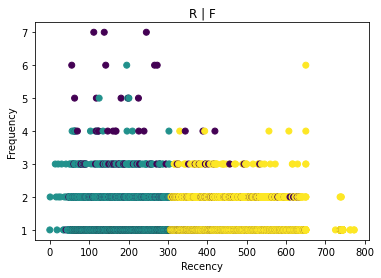

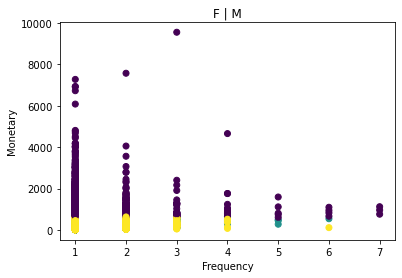

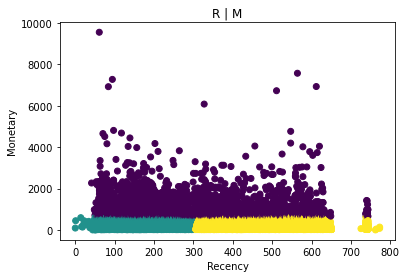

In [4]:
from olist_commons import plot_clusters_3d_v1
plot_clusters_2d_v1(r, f, 'R | F', r_label, f_label, clu_labels)
plot_clusters_2d_v1(f, m, 'F | M', f_label, m_label, clu_labels)
plot_clusters_2d_v1(r, m, 'R | M', r_label, m_label, clu_labels)

### Second version

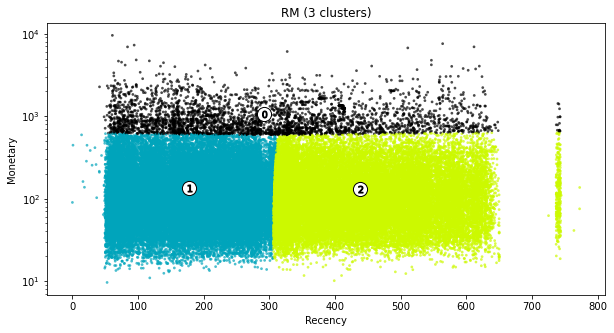

In [5]:
from olist_commons import plot_clusters_2d
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.semilogy()
plot_clusters_2d(
    ax, f'RM ({n_clusters} clusters)',
    xy=[r, m], xy_labels=[r_label, m_label],
    xy_clu_centers=[r_centers, m_centers],
    clu_labels=clu_labels
)

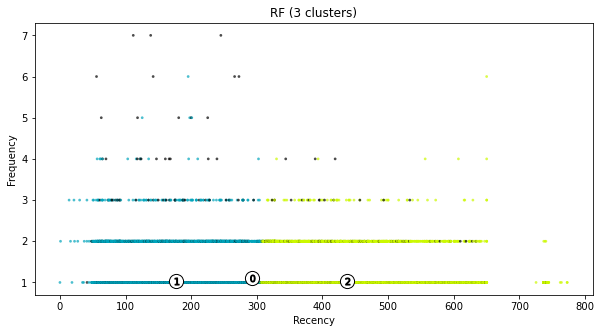

In [6]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plot_clusters_2d(
    ax, f'RF ({n_clusters} clusters)',
    xy=[r, f], xy_labels=[r_label, f_label],
    xy_clu_centers=[r_centers, f_centers],
    clu_labels=clu_labels
)

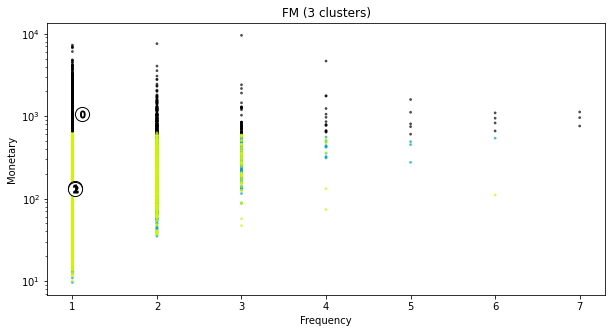

In [7]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
plt.semilogy()
plot_clusters_2d(
    ax, f'FM ({n_clusters} clusters)',
    xy=[f, m], xy_labels=[f_label, m_label],
    xy_clu_centers=[f_centers, m_centers],
    clu_labels=clu_labels
)

## Plot clusters RFM 3D

In [8]:
from olist_commons import plot_clusters_3d_v1

In [9]:
rfm, rmf, fmr, frm, mrf, mfr = (
    [r, f, m], [r, m, f], [f, m, r],
    [f, r, m], [m, r, f], [m, f, r]
)
(
    rfm_labels, rmf_labels, fmr_labels,
    frm_labels, mrf_labels, mfr_labels
) = (
    [r_label, f_label, m_label], [r_label, m_label, f_label],
    [f_label, m_label, r_label], [f_label, r_label, m_label],
    [m_label, r_label, f_label], [m_label, f_label, r_label],
)

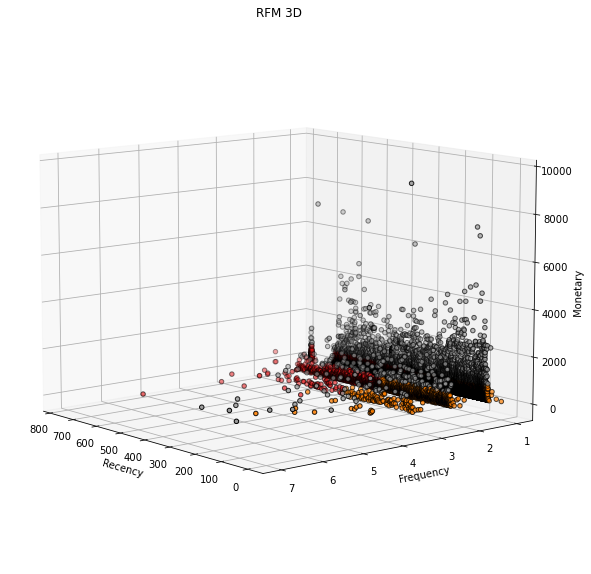

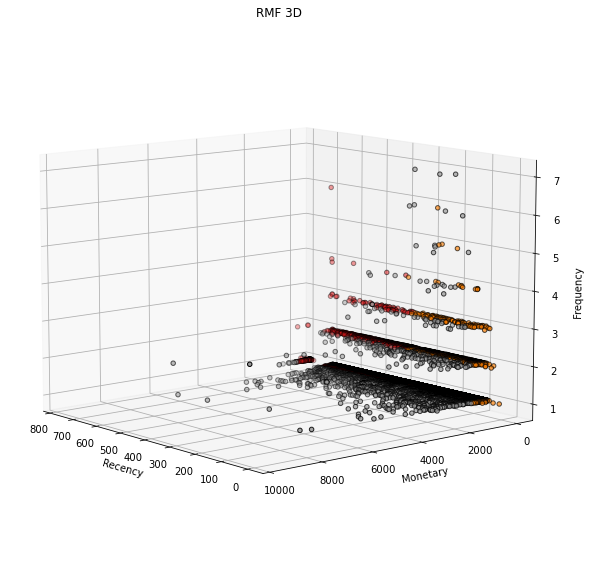

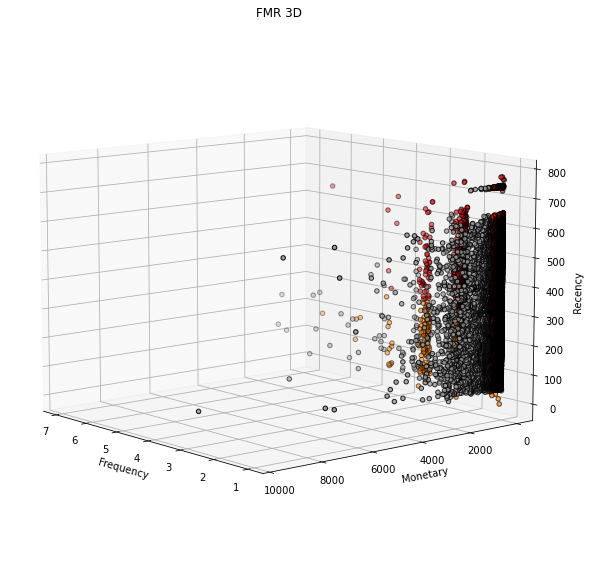

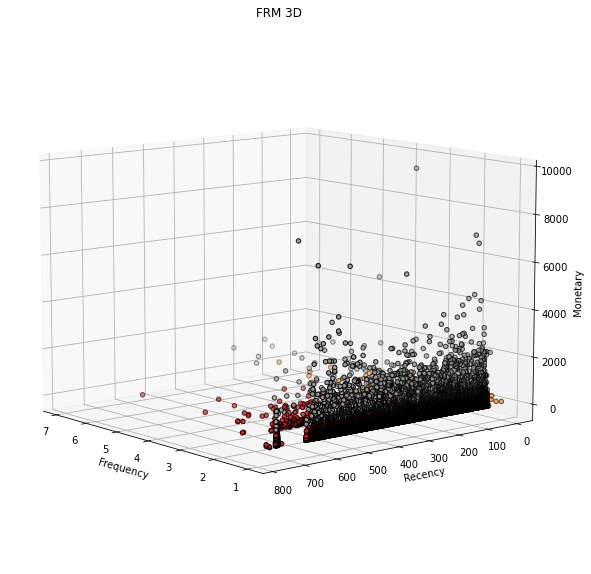

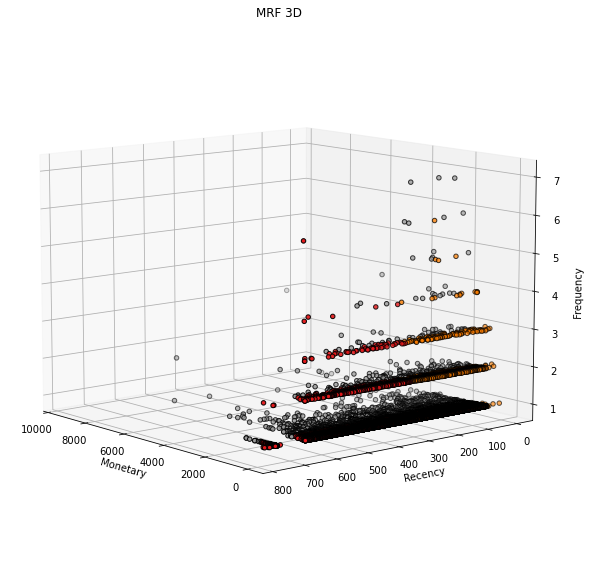

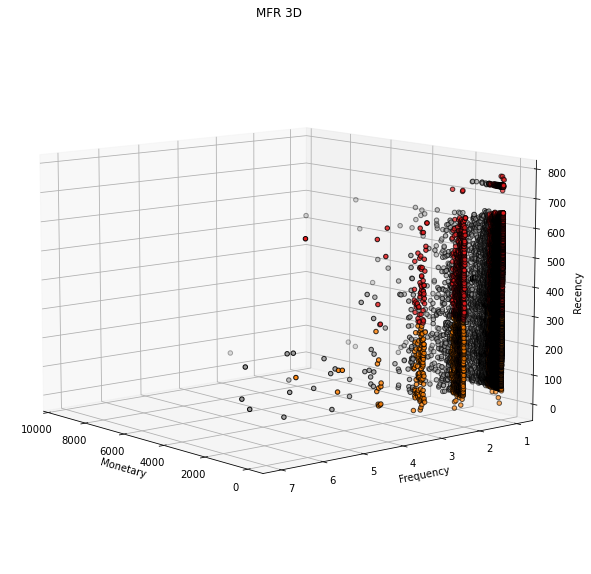

In [10]:
plot_clusters_3d_v1(rfm, rfm_labels, clu_labels, 'RFM 3D', (10, 10))
plot_clusters_3d_v1(rmf, rmf_labels, clu_labels, 'RMF 3D', (10, 10))
plot_clusters_3d_v1(fmr, fmr_labels, clu_labels, 'FMR 3D', (10, 10))
plot_clusters_3d_v1(frm, frm_labels, clu_labels, 'FRM 3D', (10, 10))
plot_clusters_3d_v1(mrf, mrf_labels, clu_labels, 'MRF 3D', (10, 10))
plot_clusters_3d_v1(mfr, mfr_labels, clu_labels, 'MFR 3D', (10, 10))

The RMF Plot is the best :

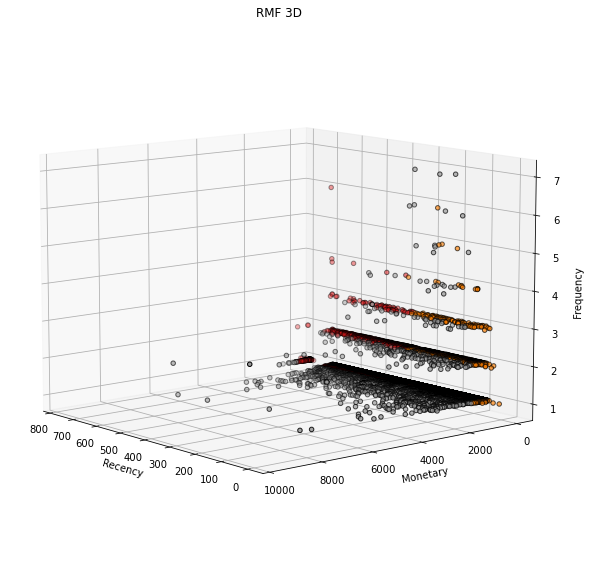

In [11]:
plot_clusters_3d_v1(rmf, rmf_labels, clu_labels, 'RMF 3D', (10, 10))

### Second version

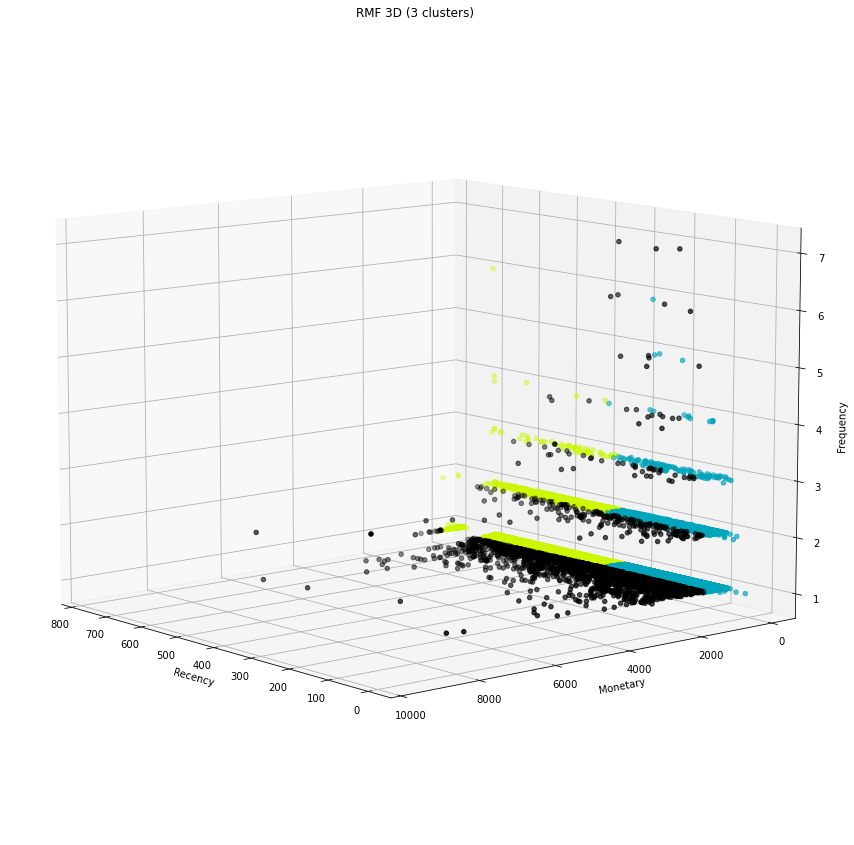

In [12]:
from olist_commons import plot_clusters_3d
fig = plt.figure(figsize=(15, 15))
ax = plt.subplot(111, projection='3d', elev=10, azim=140)
plot_clusters_3d(
    ax=ax,
    title=f'RMF 3D ({n_clusters} clusters)',
    xyz=[r, m, f],
    xyz_labels=[r_label, m_label, f_label],
    clu_labels=clu_labels,
)

## Plot Silhouette

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
slh_avg = silhouette_score(crfm_1, clu_labels)
print('Avegarde silhouette score :', slh_avg)
# Compute the silhouette scores for each sample
slh_vals = silhouette_samples(crfm_1, clu_labels)

Avegarde silhouette score : 0.4346383244775659


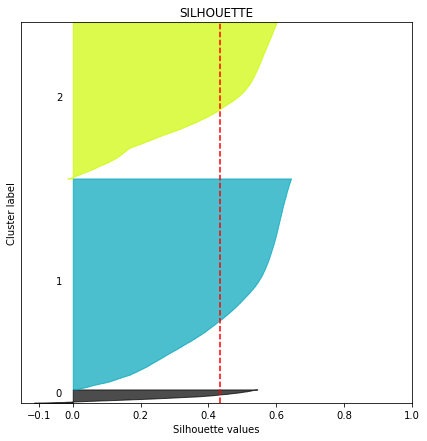

In [115]:
from olist_commons import plot_silhouette
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(7, 7)
plot_silhouette(ax, slh_avg, slh_vals, clu_labels)

## All in one

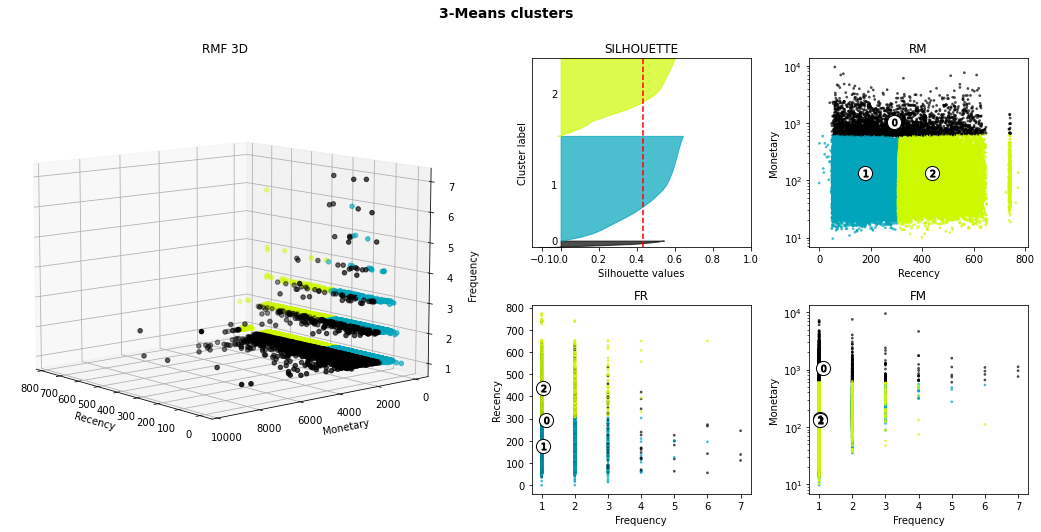

In [15]:
from olist_commons import plot_kmeans_rfm_clusters
plot_kmeans_rfm_clusters(
    rfm, rfm_labels, rfm_centers,
    clu_labels, slh_avg, slh_vals)

# Business analysis of clusters

De quoi j'ai besoin, pour quoi faire ?

* ✔ Commencer sur la base du cas k=3
* ✔ Besoin des classes et du tout, pour sortir des indicateurs par classe et globaux pour obtenir des indicateurs relatifs
* pour chaque classe :
    * ✔ nombre de clients
    * ✔ total des montants (CA)
    * période
    * ✔ dégrossissage hypercubique du domaine : intervalles de R, F, M
    * extension : intervalles pour d'autres features à envisager => envisager d'autres features => retour au feature engineering
    * description textuelle + pertinence
* mise en tableau + graphiques (monovariés, violin plots)
* boxplots par feature
* bivariées (et trivariées) par feature au sein de chaque classe => occasion d'utiliser Seaborn (permet de multiplier les dimensions représentées tout en restant compact)
* ✔ donner une représentation manuelle (abstraction manuelle)
* Utiliser des métriques de comparaison entre classes découvertes et classes manuelles
* ne pas perdre de vue le but : identifier les clients les plus intéressants

* features qui pourraient être pertinentes :
    * localisation géographique
    * reviews
    * ... réfléchir en revenant aux données sources, et avec de l'empathie
    * ex. périodes de l'année, comme les fêtes, l'été, l'hiver, etc


### Rappel des indications :
* **M37** [21/11] Pour chaque valeur « k » sélectionnée, vérification du nombre de clients par cluster. Si ce nombre est trop faible pour certains clusters (par exemple <500, pour 95 000 clients), la valeur « k » n’est pas pertinente d’un point de vue métier.
* **M38** [21/11] Si elle est pertinente, l’analyse se poursuit par l’analyse des clusters, afin de déterminer les profils de clients de chaque cluster et s’assurer de la pertinence de chaque cluster d’un point de vue métier, par exemple :
* **M39** [21/11] Pour chaque feature, un graphique de boxplot par cluster.
* **M310** [21/11] Et/ou inversement, pour chaque cluster un graphique de boxplot par feature (c’est complémentaire aux premiers graphiques).
* **M311** [21/11] Des graphiques d’analyse bivariée entre 2 features, ou 3D entre 3 features.
* **M312** [21/11] Pour chaque feature, un calcul de moyenne par cluster.
* **M313** [21/11] L’analyse des graphiques permet de formaliser un profil de clients par cluster, par exemple « cluster 0 = clients avec des montants élevés et une fréquence de commande élevée », etc.
* **M314** [21/11] Cette analyse permet de valider que chaque cluster décrit une typologie de clients qui a du sens d’un point de vue métier (dans notre cas, pour séparer les clients plus ou moins intéressants), et qui est différente des autres clusters.

### Mise au point avec k = 3

#### Labeling

In [26]:
import pandas as pd
crfm_1_labeled = pd.concat([
    pd.Series(clu_labels, index=crfm_1.index, name='k3_clu'),
    crfm_1
], axis=1)
display(crfm_1_labeled)


,k3_clu,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,1,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,1,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,1,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,1,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,1,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,2,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,2,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,2,764.087488,1,40.95


#### Cluster cardinalities

In [39]:
clu_counts = crfm_1_labeled.k3_clu.value_counts()
display(clu_counts)

1    53295
2    39430
0     3368
Name: k3_clu, dtype: int64

#### Cluster per feature stats

In [43]:
gpby = crfm_1_labeled.groupby(by='k3_clu').agg(
    ['min', 'max', 'mean', 'median', 'std', 'skew', pd.Series.kurt]
)
print(r_label)
display(gpby.R)
print(f_label)
display(gpby.F)
print(m_label)
display(gpby.M)

Recency


,min,max,mean,median,std,skew,kurt
k3_clu,,,,,,,
0,41.279236,743.042975,292.188675,276.889635,154.066471,0.457577,-0.612687
1,0.000000,311.036539,177.455932,179.069028,72.667174,-0.043665,-1.188516
2,306.140394,772.843738,437.553144,424.951163,96.493596,0.533821,-0.554942


Frequency


,min,max,mean,median,std,skew,kurt
k3_clu,,,,,,,
0,1,7,1.118765,1.0,0.471490,6.009883,48.804734
1,1,6,1.034112,1.0,0.198031,6.770327,59.707468
2,1,6,1.027974,1.0,0.176919,7.211765,67.293829


Monetary


,min,max,mean,median,std,skew,kurt
k3_clu,,,,,,,
0,585.64,9553.02,1053.080748,850.28,606.533994,4.128612,31.602059
1,0.00,613.15,135.732119,106.50,103.895303,1.716305,3.288748
2,0.00,628.35,132.196006,102.03,101.332291,1.727816,3.311223


#### Turnover

Total and mean by customer.

In [62]:
m_labeled = crfm_1_labeled[['k3_clu', 'M']]
m_gpby = m_labeled.groupby(by='k3_clu').agg(
    ['count', 'min', 'max', 'sum', 'mean', 'median', 'std', 'skew', pd.Series.kurt]
)
display(m_gpby.M)
turnover_abs = m_gpby.M['sum'].rename('toa')
turnover_rel = (turnover_abs / turnover_abs.sum()).rename('tor')
turnover = pd.concat([turnover_abs, turnover_rel], axis=1)
display(turnover)

,count,min,max,sum,mean,median,std,skew,kurt
k3_clu,,,,,,,,,
0,3368,585.64,9553.02,3546775.96,1053.080748,850.28,606.533994,4.128612,31.602059
1,53295,0.00,613.15,7233843.26,135.732119,106.50,103.895303,1.716305,3.288748
2,39430,0.00,628.35,5212488.53,132.196006,102.03,101.332291,1.727816,3.311223


,toa,tor
k3_clu,,
0,3546775.96,0.221769
1,7233843.26,0.452310
2,5212488.53,0.325921


#### Hypercubic roughing of the domain

In [63]:
gpby_3 = crfm_1_labeled.groupby(by='k3_clu').agg(
    ['min', 'max']
)
display(gpby_3)

R               F           M         
               min         max min max     min      max
k3_clu                                                 
0        41.279236  743.042975   1   7  585.64  9553.02
1         0.000000  311.036539   1   6    0.00   613.15
2       306.140394  772.843738   1   6    0.00   628.35

#### Manual stereotyping

* Frequency is not critical
* The classes mainly depend on a partition of the R and M domains

In [68]:
import numpy as np
classes_def = {
    0: {'R': [0, np.inf], 'M': [600, np.inf]},
    1: {'R': [0, 300], 'M': [0, 600]},
    2: {'R': [300, np.inf], 'M': [0, 600]},
}

In [73]:
"""def classes_labeling(rfm, classes_def):
    label = pd.Series(data=-1, index=rfm.index, name='label')
    for c_id in classes_def:
        c_def = classes_def[c_id]
        c_bindex = (
              ((c_def['R'][0] <= rfm.R) & (rfm.R < c_def['R'][1]))
            & ((c_def['M'][0] <= rfm.M) & (rfm.M < c_def['M'][1]))
        )
        label[c_bindex] = c_id
    return label   """    

In [75]:
from olist_commons import classes_labeling
cla_labels = classes_labeling(crfm_1, classes_def)
display(cla_labels)

customer_unique_id
87ab9fec999db8bd5774917de3cdf01c    1
262e1f1e26e92e86375f86840b4ffd63    1
af5454198a97379394cacf676e1e96cb    1
634420a0ea42302205032ed44ac7fccc    1
9bb92bebd4cb7511e1a02d5e50bc4655    1
                                   ..
0eb1ee9dba87f5b36b4613a65074337c    2
830d5b7aaa3b6f1e9ad63703bec97d23    2
009b0127b727ab0ba422f6d9604487c7    2
4854e9b3feff728c13ee5fc7d1547e92    2
b7d76e111c89f7ebf14761390f0f7d17    2
Name: label, Length: 96093, dtype: int64

In [76]:
import pandas as pd
crfm_1_mlabeled = pd.concat([
    pd.Series(cla_labels, index=crfm_1.index, name='k3_cla'),
    crfm_1
], axis=1)
display(crfm_1_mlabeled)

,k3_cla,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,1,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,1,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,1,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,1,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,1,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,2,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,2,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,2,764.087488,1,40.95


In [77]:
cla_counts = crfm_1_mlabeled.k3_cla.value_counts()
display(cla_counts)

1    52089
2    40610
0     3394
Name: k3_cla, dtype: int64

### Mise en fonction avec k = 4

In [23]:
import pandas as pd
def classes_labeling(rfm, classes_def):
    label = pd.Series(data=-1, index=rfm.index, name='label')
    for c_id in classes_def:
        c_def = classes_def[c_id]
        c_bindex = (
              ((c_def['R'][0] <= rfm.R) & (rfm.R < c_def['R'][1]))
            & ((c_def['M'][0] <= rfm.M) & (rfm.M < c_def['M'][1]))
        )
        label[c_bindex] = c_id
    return label

import time
from sklearn.cluster import KMeans
def kmeans_clustering(crfm, k):
    km_t = -time.time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(crfm)
    km_t += time.time()
    clu_labels = kmeans.labels_
    clu_centers = kmeans.cluster_centers_
    rfm = r, f, m = crfm.R, crfm.F, crfm.M
    rfm_labels = r_label, f_label, m_label = 'Recency', 'Frequency', 'Monetary'
    rfm_centers = r_centers, f_centers, m_centers = (
        clu_centers[:, 0],
        clu_centers[:, 1],
        clu_centers[:, 2],
    )
    return kmeans, clu_labels, rfm, rfm_labels, rfm_centers, km_t

import pandas as pd
from pepper_commons import print_subtitle
def clusters_business_analysis(crfm, k, classes_def):
    # k-Means clustering
    kmeans, clu_labels, rfm, rfm_labels, rfm_centers, km_t = kmeans_clustering(crfm, k)
    r_label, f_label, m_label = rfm_labels
    # Labeling
    print_subtitle('Labeling')
    crfm_labeled = pd.concat([
        pd.Series(clu_labels, index=crfm.index, name='k_clu'),
        crfm
    ], axis=1)
    display(crfm_labeled)
    # Cluster cardinalities
    print_subtitle('Cluster cardinalities')
    clu_counts = crfm_labeled.k_clu.value_counts()
    display(clu_counts)
    # Cluster per feature stats
    print_subtitle('Cluster per feature stats')
    gpby = crfm_labeled.groupby(by='k_clu').agg(
        ['min', 'max', 'mean', 'median', 'std', 'skew', pd.Series.kurt]
    )
    print(r_label)
    display(gpby.R)
    print(m_label)
    display(gpby.M)
    print(f_label + ' (less pertinent)')
    display(gpby.F)

    # Turnover
    print_subtitle('Turnover')
    m_labeled = crfm_labeled[['k_clu', 'M']]
    m_gpby = m_labeled.groupby(by='k_clu').agg(
        ['count', 'min', 'max', 'sum', 'mean', 'median', 'std', 'skew', pd.Series.kurt]
    )
    turnover_abs = m_gpby.M['sum'].rename('toa')
    turnover_rel = (turnover_abs / turnover_abs.sum()).rename('tor')
    turnover = pd.concat([turnover_abs, turnover_rel], axis=1)
    display(turnover)
    display(m_gpby.M)
    # Hypercubic roughing of the domain
    print_subtitle('Hypercubic roughing of the domain')
    gpby_3 = crfm_labeled.groupby(by='k_clu').agg(
        ['min', 'max']
    )
    display(gpby_3)
    # Manual sterotyping
    import numpy as np
    print_subtitle('Manual sterotyping')
    cla_labels = classes_labeling(crfm, classes_def)
    crfm_mlabeled = pd.concat([
        pd.Series(cla_labels, index=crfm.index, name='k_cla'),
        crfm
    ], axis=1)
    display(crfm_mlabeled)
    # Compare cluster (machine learning) | classes (manual)
    print_subtitle('Compare cluster (machine learning) | classes (manual)')
    cla_counts = crfm_mlabeled.k_cla.value_counts()
    #display(cla_counts)
    cl_comp = pd.concat([clu_counts, cla_counts], axis=1)
    display(cl_comp)

In [24]:
import numpy as np
classes_def = {
    0: {'R': [0, 308], 'M': [0, 400]},
    1: {'R': [0, np.inf], 'M': [400, 1200]},
    2: {'R': [0, np.inf], 'M': [1200, np.inf]},
    3: {'R': [308, np.inf], 'M': [0, 400]},
}
clusters_business_analysis(crfm_1, 4, classes_def)


Labeling


,k_clu,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,0,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,1,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,1,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,0,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,0,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,3,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,3,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,3,764.087488,1,40.95



Cluster cardinalities


0    51004
3    37701
1     6544
2      844
Name: k_clu, dtype: int64


Cluster per feature stats
Recency


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,0.000000,308.492627,177.722253,179.094606,73.025638,-0.037612,-1.188112
1,0.884907,743.042975,278.402893,262.114410,142.820278,0.533717,-0.321586
2,41.279236,742.134606,293.888226,278.960058,162.913603,0.363236,-0.917633
3,308.384329,772.843738,439.242191,426.922234,96.432721,0.518576,-0.566759


Monetary


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,0.00,389.12,119.614083,101.055,75.918923,1.033683,0.585185
1,338.12,1203.68,587.694467,526.845,201.124421,1.015749,0.236709
2,1199.47,9553.02,1813.583732,1585.715,788.901256,3.908864,23.811952
3,0.00,467.20,119.778621,98.660,78.895434,1.195228,1.051703


Frequency (less pertinent)


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,1,5,1.028664,1.0,0.177123,6.743785,52.922792
1,1,7,1.130654,1.0,0.443902,5.063504,37.960629
2,1,5,1.099526,1.0,0.395166,5.007351,30.140732
3,1,6,1.024403,1.0,0.163479,7.575327,75.616714



Turnover


,toa,tor
k_clu,,
0,6100796.69,0.381464
1,3845872.59,0.240471
2,1530664.67,0.095708
3,4515773.80,0.282357


,count,min,max,sum,mean,median,std,skew,kurt
k_clu,,,,,,,,,
0,51004,0.00,389.12,6100796.69,119.614083,101.055,75.918923,1.033683,0.585185
1,6544,338.12,1203.68,3845872.59,587.694467,526.845,201.124421,1.015749,0.236709
2,844,1199.47,9553.02,1530664.67,1813.583732,1585.715,788.901256,3.908864,23.811952
3,37701,0.00,467.20,4515773.80,119.778621,98.660,78.895434,1.195228,1.051703



Hypercubic roughing of the domain


R               F            M         
              min         max min max      min      max
k_clu                                                  
0        0.000000  308.492627   1   5     0.00   389.12
1        0.884907  743.042975   1   7   338.12  1203.68
2       41.279236  742.134606   1   5  1199.47  9553.02
3      308.384329  772.843738   1   6     0.00   467.20


Manual sterotyping


,k_cla,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,0,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,1,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,1,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,0,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,0,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,3,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,3,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,3,764.087488,1,40.95



Compare cluster (machine learning) | classes (manual)


,k_clu,k_cla
0,51004,51547
3,37701,38118
1,6544,5583
2,844,845


### k = 5

In [28]:
import numpy as np
classes_def = {
    0: {'R': [310, np.inf], 'M': [0, 360]},
    1: {'R': [0, 310], 'M': [0, 360]},
    2: {'R': [0, np.inf], 'M': [1620, np.inf]},
    3: {'R': [0, np.inf], 'M': [660, 1620]},
    4: {'R': [0, np.inf], 'M': [360, 660]},
}
clusters_business_analysis(crfm_1, 5, classes_def)


Labeling


,k_clu,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,1,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,4,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,4,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,1,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,1,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,0,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,0,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,0,764.087488,1,40.95



Cluster cardinalities


1    48038
0    35238
4    10062
3     2346
2      409
Name: k_clu, dtype: int64


Cluster per feature stats
Recency


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,309.757951,772.843738,444.563120,433.774346,96.004508,0.475290,-0.589987
1,0.000000,312.390231,178.051196,178.892847,73.990394,-0.013003,-1.183707
2,41.279236,629.042222,288.160621,261.903866,167.634933,0.406532,-1.071030
3,48.302986,743.042975,298.041893,279.075637,158.330378,0.438196,-0.666260
4,0.884907,742.200463,264.214200,258.315515,123.428271,0.456175,-0.105047


Monetary


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,0.00,467.20,110.114013,94.08,67.234708,1.141956,1.317001
1,0.00,295.57,106.057999,94.40,58.979005,0.657121,-0.396042
2,1619.73,9553.02,2292.185746,2029.62,909.712028,3.699716,18.847371
3,651.32,1620.77,947.855281,872.69,241.360213,0.871215,-0.259062
4,217.64,676.16,383.315796,356.14,109.869859,0.783377,-0.289470


Frequency (less pertinent)


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,1,6,1.021766,1.0,0.154976,8.169107,90.260381
1,1,3,1.022794,1.0,0.155667,7.157102,54.833263
2,1,4,1.088020,1.0,0.379729,5.226378,30.752658
3,1,7,1.120631,1.0,0.485553,6.244270,52.330895
4,1,6,1.113298,1.0,0.370737,4.076239,22.968623



Turnover


,toa,tor
k_clu,,
0,3880197.60,0.242617
1,5094814.15,0.318563
2,937503.97,0.058619
3,2223668.49,0.139039
4,3856923.54,0.241162


,count,min,max,sum,mean,median,std,skew,kurt
k_clu,,,,,,,,,
0,35238,0.00,467.20,3880197.60,110.114013,94.08,67.234708,1.141956,1.317001
1,48038,0.00,295.57,5094814.15,106.057999,94.40,58.979005,0.657121,-0.396042
2,409,1619.73,9553.02,937503.97,2292.185746,2029.62,909.712028,3.699716,18.847371
3,2346,651.32,1620.77,2223668.49,947.855281,872.69,241.360213,0.871215,-0.259062
4,10062,217.64,676.16,3856923.54,383.315796,356.14,109.869859,0.783377,-0.289470



Hypercubic roughing of the domain


R               F            M         
              min         max min max      min      max
k_clu                                                  
0      309.757951  772.843738   1   6     0.00   467.20
1        0.000000  312.390231   1   3     0.00   295.57
2       41.279236  629.042222   1   4  1619.73  9553.02
3       48.302986  743.042975   1   7   651.32  1620.77
4        0.884907  742.200463   1   6   217.64   676.16


Manual sterotyping


,k_cla,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,1,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,4,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,4,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,1,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,1,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,0,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,0,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,0,764.087488,1,40.95



Compare cluster (machine learning) | classes (manual)


,k_clu,k_cla
1,48038,51245
0,35238,37050
4,10062,5011
3,2346,2378
2,409,409


### k = 6

In [29]:
import numpy as np
classes_def = {
    0: {'R': [310, np.inf], 'M': [0, 360]},
    1: {'R': [0, 310], 'M': [0, 360]},
    2: {'R': [0, np.inf], 'M': [1620, np.inf]},
    3: {'R': [0, np.inf], 'M': [660, 1620]},
    4: {'R': [0, np.inf], 'M': [360, 660]},
    5: {'R': [0, np.inf], 'M': [360, 660]},
}
clusters_business_analysis(crfm_1, 6, classes_def)


Labeling


,k_clu,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,5,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,0,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,0,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,5,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,5,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,1,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,1,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,1,764.087488,1,40.95



Cluster cardinalities


5    32408
3    31768
1    20713
0     8849
2     2015
4      340
Name: k_clu, dtype: int64


Cluster per feature stats
Recency


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,0.884907,743.042975,266.996898,254.848762,126.305222,0.482823,-0.134589
1,398.062234,772.843738,510.465269,503.305486,69.137693,0.630146,0.146295
2,48.302986,742.920012,295.722258,276.166146,157.795653,0.421643,-0.760464
3,215.773218,413.814769,304.891667,307.194294,52.106164,0.182028,-1.031276
4,41.279236,629.042222,278.326918,230.950839,170.191663,0.506689,-1.022725
5,0.000000,227.289062,135.216404,135.065995,49.869857,-0.001333,-1.286662


Monetary


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,254.88,728.74,418.030364,384.270,118.618600,0.797179,-0.388312
1,0.00,534.98,118.261169,98.200,76.997141,1.208293,1.287609
2,705.26,1719.92,1023.590268,937.640,257.019923,0.865001,-0.250945
3,10.07,271.08,104.049552,91.035,58.416087,0.713592,-0.347604
4,1724.04,9553.02,2420.710647,2106.060,947.454954,3.595055,17.282757
5,0.00,332.92,112.731155,99.330,64.869525,0.735903,-0.194647


Frequency (less pertinent)


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,1,6,1.115945,1.0,0.379314,4.112493,23.260691
1,1,6,1.023174,1.0,0.163382,8.473161,101.871251
2,1,7,1.125062,1.0,0.502469,6.265702,51.869601
3,1,3,1.021531,1.0,0.149423,7.151374,53.637046
4,1,4,1.097059,1.0,0.405701,4.996604,27.580751
5,1,4,1.026105,1.0,0.167748,6.825242,50.992527



Turnover


,toa,tor
k_clu,,
0,3699150.69,0.231297
1,2449543.60,0.153162
2,2062534.39,0.128964
3,3305446.18,0.206679
4,823041.62,0.051462
5,3653391.27,0.228435


,count,min,max,sum,mean,median,std,skew,kurt
k_clu,,,,,,,,,
0,8849,254.88,728.74,3699150.69,418.030364,384.270,118.618600,0.797179,-0.388312
1,20713,0.00,534.98,2449543.60,118.261169,98.200,76.997141,1.208293,1.287609
2,2015,705.26,1719.92,2062534.39,1023.590268,937.640,257.019923,0.865001,-0.250945
3,31768,10.07,271.08,3305446.18,104.049552,91.035,58.416087,0.713592,-0.347604
4,340,1724.04,9553.02,823041.62,2420.710647,2106.060,947.454954,3.595055,17.282757
5,32408,0.00,332.92,3653391.27,112.731155,99.330,64.869525,0.735903,-0.194647



Hypercubic roughing of the domain


R               F            M         
              min         max min max      min      max
k_clu                                                  
0        0.884907  743.042975   1   6   254.88   728.74
1      398.062234  772.843738   1   6     0.00   534.98
2       48.302986  742.920012   1   7   705.26  1719.92
3      215.773218  413.814769   1   3    10.07   271.08
4       41.279236  629.042222   1   4  1724.04  9553.02
5        0.000000  227.289062   1   4     0.00   332.92


Manual sterotyping


,k_cla,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,1,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,5,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,5,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,1,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,1,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,0,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,0,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,0,764.087488,1,40.95



Compare cluster (machine learning) | classes (manual)


,k_clu,k_cla
5,32408,5011.0
3,31768,2378.0
1,20713,51245.0
0,8849,37050.0
2,2015,409.0
4,340,NaN


### k = 7

In [32]:
import numpy as np
classes_def = {
    0: {'R': [310, np.inf], 'M': [0, 360]},
    1: {'R': [0, 310], 'M': [0, 360]},
    2: {'R': [0, np.inf], 'M': [1620, np.inf]},
    3: {'R': [0, np.inf], 'M': [660, 1620]},
    4: {'R': [0, np.inf], 'M': [360, 660]},
    5: {'R': [0, np.inf], 'M': [360, 660]},
    6: {'R': [0, np.inf], 'M': [360, 660]},
}
clusters_business_analysis(crfm_1, 7, classes_def)


Labeling


,k_clu,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,6,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,5,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,0,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,6,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,6,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,2,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,2,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,2,764.087488,1,40.95



Cluster cardinalities


6    31237
1    30491
2    20625
5     9919
0     2965
4      772
3       84
Name: k_clu, dtype: int64


Cluster per feature stats
Recency


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,13.940845,743.042975,297.781334,278.694931,155.031749,0.465598,-0.591216
1,216.286030,418.260810,306.180818,308.805532,52.519959,0.177793,-1.026815
2,394.960486,772.843738,511.512771,504.712859,68.851277,0.622898,0.151639
3,60.891458,624.019815,313.688182,302.217535,188.026128,0.247156,-1.474319
4,41.279236,742.134606,291.572852,278.467326,159.462187,0.372063,-0.830064
5,0.884907,609.256736,248.728624,240.249028,109.142671,0.315730,-0.387353
6,0.000000,225.370313,134.683571,134.237454,49.820195,0.011672,-1.286443


Monetary


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,518.50,1185.58,763.112034,720.980,163.999261,0.744501,-0.417726
1,10.07,245.35,97.847994,87.160,51.969734,0.594795,-0.594733
2,0.00,534.98,119.853604,99.670,79.311810,1.308122,1.787671
3,2606.01,9553.02,3593.426786,3099.425,1295.755587,2.446905,6.552141
4,1186.58,2590.61,1610.298899,1500.820,345.240925,0.780558,-0.421888
5,209.20,572.87,342.844208,325.370,86.104778,0.630901,-0.470451
6,0.00,289.39,106.583427,95.650,58.276328,0.613102,-0.459619


Frequency (less pertinent)


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,1,7,1.125801,1.0,0.483212,5.900479,47.473354
1,1,3,1.019350,1.0,0.141512,7.527080,59.354798
2,1,6,1.023370,1.0,0.164300,8.448280,100.959196
3,1,4,1.130952,1.0,0.459957,4.301316,21.023151
4,1,5,1.099741,1.0,0.393395,4.966661,29.899740
5,1,6,1.108176,1.0,0.354006,3.907751,20.500884
6,1,3,1.022890,1.0,0.156254,7.169181,55.141215



Turnover


,toa,tor
k_clu,,
0,2262627.18,0.141475
1,2983483.18,0.186548
2,2471980.58,0.154565
3,301847.85,0.018874
4,1243150.75,0.077730
5,3400671.70,0.212634
6,3329346.51,0.208174


,count,min,max,sum,mean,median,std,skew,kurt
k_clu,,,,,,,,,
0,2965,518.50,1185.58,2262627.18,763.112034,720.980,163.999261,0.744501,-0.417726
1,30491,10.07,245.35,2983483.18,97.847994,87.160,51.969734,0.594795,-0.594733
2,20625,0.00,534.98,2471980.58,119.853604,99.670,79.311810,1.308122,1.787671
3,84,2606.01,9553.02,301847.85,3593.426786,3099.425,1295.755587,2.446905,6.552141
4,772,1186.58,2590.61,1243150.75,1610.298899,1500.820,345.240925,0.780558,-0.421888
5,9919,209.20,572.87,3400671.70,342.844208,325.370,86.104778,0.630901,-0.470451
6,31237,0.00,289.39,3329346.51,106.583427,95.650,58.276328,0.613102,-0.459619



Hypercubic roughing of the domain


R               F            M         
              min         max min max      min      max
k_clu                                                  
0       13.940845  743.042975   1   7   518.50  1185.58
1      216.286030  418.260810   1   3    10.07   245.35
2      394.960486  772.843738   1   6     0.00   534.98
3       60.891458  624.019815   1   4  2606.01  9553.02
4       41.279236  742.134606   1   5  1186.58  2590.61
5        0.884907  609.256736   1   6   209.20   572.87
6        0.000000  225.370313   1   3     0.00   289.39


Manual sterotyping


,k_cla,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,1,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,6,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,6,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,1,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,1,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,0,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,0,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,0,764.087488,1,40.95



Compare cluster (machine learning) | classes (manual)


,k_clu,k_cla
6,31237,5011.0
1,30491,51245.0
2,20625,409.0
5,9919,NaN
0,2965,37050.0
4,772,NaN
3,84,2378.0


### k = 8

In [33]:
import numpy as np
classes_def = {
    0: {'R': [310, np.inf], 'M': [0, 360]},
    1: {'R': [0, 310], 'M': [0, 360]},
    2: {'R': [0, np.inf], 'M': [1620, np.inf]},
    3: {'R': [0, np.inf], 'M': [660, 1620]},
    4: {'R': [0, np.inf], 'M': [360, 660]},
    5: {'R': [0, np.inf], 'M': [360, 660]},
    6: {'R': [0, np.inf], 'M': [360, 660]},
    7: {'R': [0, np.inf], 'M': [360, 660]},
}
clusters_business_analysis(crfm_1, 8, classes_def)


Labeling


,k_clu,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,0,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,5,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,2,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,0,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,0,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,1,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,1,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,1,764.087488,1,40.95



Cluster cardinalities


4    29815
0    28555
1    18210
5     9281
6     6346
2     3023
3      779
7       84
Name: k_clu, dtype: int64


Cluster per feature stats
Recency


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,0.000000,220.399549,134.571619,134.097454,49.796933,0.007057,-1.294596
1,407.939062,772.843738,511.879108,504.935382,69.040848,0.624112,0.145188
2,13.940845,742.920012,282.983377,263.722315,145.721479,0.541331,-0.404049
3,41.279236,742.134606,292.293818,279.058970,159.189298,0.364352,-0.831337
4,218.776088,408.390150,304.735732,307.177975,51.400941,0.182325,-1.005743
5,0.884907,305.144259,172.589934,175.354062,66.500945,-0.061337,-1.073969
6,292.218588,743.240475,430.713245,416.939138,89.808849,0.624088,-0.196719
7,60.891458,624.019815,313.688182,302.217535,188.026128,0.247156,-1.474319


Monetary


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,0.00,214.48,94.957003,87.810,47.681401,0.430606,-0.828309
1,0.00,299.84,95.919985,85.140,50.691660,0.679077,-0.245123
2,516.73,1180.51,756.666328,715.170,165.061105,0.726711,-0.429551
3,1181.11,2590.61,1606.463877,1493.450,346.039012,0.784588,-0.413659
4,10.07,238.72,97.473324,87.800,50.466820,0.538548,-0.657132
5,185.35,566.79,300.116173,274.560,87.536149,0.936371,0.030533
6,182.98,663.93,315.580952,297.620,87.952087,0.849346,0.190602
7,2606.01,9553.02,3593.426786,3099.425,1295.755587,2.446905,6.552141


Frequency (less pertinent)


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,1,3,1.018035,1.0,0.137991,7.989837,68.171392
1,1,6,1.017408,1.0,0.142447,10.329691,161.978407
2,1,7,1.126365,1.0,0.488020,5.934474,47.673549
3,1,5,1.101412,1.0,0.394350,4.904008,29.273456
4,1,3,1.019151,1.0,0.140921,7.584628,60.394470
5,1,5,1.103329,1.0,0.343647,3.848470,18.685382
6,1,4,1.076741,1.0,0.290003,4.080533,18.635865
7,1,4,1.130952,1.0,0.459957,4.301316,21.023151



Turnover


,toa,tor
k_clu,,
0,2711497.22,0.169542
1,1746702.93,0.109216
2,2287402.31,0.143024
3,1251435.36,0.078248
4,2906167.16,0.181714
5,2785378.20,0.174161
6,2002676.72,0.125221
7,301847.85,0.018874


,count,min,max,sum,mean,median,std,skew,kurt
k_clu,,,,,,,,,
0,28555,0.00,214.48,2711497.22,94.957003,87.810,47.681401,0.430606,-0.828309
1,18210,0.00,299.84,1746702.93,95.919985,85.140,50.691660,0.679077,-0.245123
2,3023,516.73,1180.51,2287402.31,756.666328,715.170,165.061105,0.726711,-0.429551
3,779,1181.11,2590.61,1251435.36,1606.463877,1493.450,346.039012,0.784588,-0.413659
4,29815,10.07,238.72,2906167.16,97.473324,87.800,50.466820,0.538548,-0.657132
5,9281,185.35,566.79,2785378.20,300.116173,274.560,87.536149,0.936371,0.030533
6,6346,182.98,663.93,2002676.72,315.580952,297.620,87.952087,0.849346,0.190602
7,84,2606.01,9553.02,301847.85,3593.426786,3099.425,1295.755587,2.446905,6.552141



Hypercubic roughing of the domain


R               F            M         
              min         max min max      min      max
k_clu                                                  
0        0.000000  220.399549   1   3     0.00   214.48
1      407.939062  772.843738   1   6     0.00   299.84
2       13.940845  742.920012   1   7   516.73  1180.51
3       41.279236  742.134606   1   5  1181.11  2590.61
4      218.776088  408.390150   1   3    10.07   238.72
5        0.884907  305.144259   1   5   185.35   566.79
6      292.218588  743.240475   1   4   182.98   663.93
7       60.891458  624.019815   1   4  2606.01  9553.02


Manual sterotyping


,k_cla,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,1,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,7,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,7,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,1,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,1,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,0,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,0,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,0,764.087488,1,40.95



Compare cluster (machine learning) | classes (manual)


,k_clu,k_cla
4,29815,NaN
0,28555,37050.0
1,18210,51245.0
5,9281,NaN
6,6346,NaN
2,3023,409.0
3,779,2378.0
7,84,5011.0


## Abstracteur de classes

L'objectif est de dériver automatiquement les classes (abstractions liénaires) partant des clusters.

Les abstractions se font sur le plan principal (TODO à confirmer avec une PCA) des dimensions M et R.

La première abstraction est la suivante :
* Les classes sont d'abord des subdivisions de M en intervalles disjoints
* puis, pour le plut petit intervalle [0, x], des subdivisions de R

Pour déterminer les limites, on prend la médiane des points limites

En bonus, les jolis diagrammes de densité 2D avec distribution marginale que l'on trouve dans SNS

On démarre avec k = 3, puis on passe à k = 9

14/12 : amorce, mais le problème est moins facile qu'il n'y parait.

D'abord, trouver les min et max par intervalles linspace n'est pas la bonne approche.

Il faut plutôt une décomposition de l'intervalle R en quantiles, sinon, un intervalle peut être moins représenté voire vide ...

Ensuite... hum, pas simple de séparer les classes

In [10]:
from pepper_commons import print_subtitle
from olist_commons import kmeans_clustering
crfm = crfm_1
k = 3

# k-Means clustering
kmeans, clu_labels, rfm, rfm_labels, rfm_centers, km_t = kmeans_clustering(crfm, k)
r_label, f_label, m_label = rfm_labels
# Labeling
print_subtitle('Labeling')
crfm_labeled = pd.concat([
    pd.Series(clu_labels, index=crfm.index, name='k_clu'),
    crfm
], axis=1)
display(crfm_labeled)
# Cluster cardinalities
print_subtitle('Cluster cardinalities')
clu_counts = crfm_labeled.k_clu.value_counts()
display(clu_counts)
# Cluster per feature stats
print_subtitle('Cluster per feature stats')
gpby = crfm_labeled.groupby(by='k_clu').agg(
    ['min', 'max', 'mean', 'median', 'std', 'skew', pd.Series.kurt]
)
print(r_label)
display(gpby.R)
print(m_label)
display(gpby.M)
print(f_label + ' (less pertinent)')
display(gpby.F)

# Turnover
print_subtitle('Turnover')
m_labeled = crfm_labeled[['k_clu', 'M']]
m_gpby = m_labeled.groupby(by='k_clu').agg(
    ['count', 'min', 'max', 'sum', 'mean', 'median', 'std', 'skew', pd.Series.kurt]
)
turnover_abs = m_gpby.M['sum'].rename('toa')
turnover_rel = (turnover_abs / turnover_abs.sum()).rename('tor')
turnover = pd.concat([turnover_abs, turnover_rel], axis=1)
display(turnover)
display(m_gpby.M)
# Hypercubic roughing of the domain
print_subtitle('Hypercubic roughing of the domain')
gpby_3 = crfm_labeled.groupby(by='k_clu').agg(
    ['min', 'max']
)


Labeling


,k_clu,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,0,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,0,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,0,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,0,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,0,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,1,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,1,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,1,764.087488,1,40.95



Cluster cardinalities


0    53295
1    39430
2     3368
Name: k_clu, dtype: int64


Cluster per feature stats
Recency


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,0.000000,311.036539,177.455932,179.069028,72.667174,-0.043665,-1.188516
1,306.140394,772.843738,437.553144,424.951163,96.493596,0.533821,-0.554942
2,41.279236,743.042975,292.188675,276.889635,154.066471,0.457577,-0.612687


Monetary


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,0.00,613.15,135.732119,106.50,103.895303,1.716305,3.288748
1,0.00,628.35,132.196006,102.03,101.332291,1.727816,3.311223
2,585.64,9553.02,1053.080748,850.28,606.533994,4.128612,31.602059


Frequency (less pertinent)


,min,max,mean,median,std,skew,kurt
k_clu,,,,,,,
0,1,6,1.034112,1.0,0.198031,6.770327,59.707468
1,1,6,1.027974,1.0,0.176919,7.211765,67.293829
2,1,7,1.118765,1.0,0.471490,6.009883,48.804734



Turnover


,toa,tor
k_clu,,
0,7233843.26,0.452310
1,5212488.53,0.325921
2,3546775.96,0.221769


,count,min,max,sum,mean,median,std,skew,kurt
k_clu,,,,,,,,,
0,53295,0.00,613.15,7233843.26,135.732119,106.50,103.895303,1.716305,3.288748
1,39430,0.00,628.35,5212488.53,132.196006,102.03,101.332291,1.727816,3.311223
2,3368,585.64,9553.02,3546775.96,1053.080748,850.28,606.533994,4.128612,31.602059



Hypercubic roughing of the domain


In [29]:
crfm_labeled_3_2 = crfm_labeled[crfm_labeled.k_clu == 2]
#display(crfm_labeled_3_2)
#crfm_labeled_3_2.plot.scatter(x='R', y='M')

r_min = crfm_labeled_3_2.R.min()
r_max = crfm_labeled_3_2.R.max()
delta_r = r_max - r_min

import numpy as np
n = 20
bins = np.linspace(r_min, r_max, n + 1)
print(bins)
m_mins = []
m_maxs = []
for k, a in enumerate(bins):
    if k == n:
        break
    b = bins[k + 1]
    print(k, '[', a, ', ', b, '[')
    crfm_labeled_3_2_a_b = crfm_labeled_3_2[
          (a <= crfm_labeled_3_2.R)
        & (crfm_labeled_3_2.R < b)
    ]
    m_mins += [crfm_labeled_3_2_a_b.M.min()]
    m_maxs += [crfm_labeled_3_2_a_b.M.max()]
    print('\tm_min : ', m_mins[k])
    print('\tm_max : ', m_maxs[k])
print('M min :', np.median(m_mins))
print('M max :', np.median(m_maxs))

[ 41.27923611  76.36742303 111.45560995 146.54379687 181.6319838
 216.72017072 251.80835764 286.89654456 321.98473148 357.0729184
 392.16110532 427.24929225 462.33747917 497.42566609 532.51385301
 567.60203993 602.69022685 637.77841377 672.86660069 707.95478762
 743.04297454]
0 [ 41.27923611111111 ,  76.3674230324074 [
	m_min :  616.5
	m_max :  9553.02
1 [ 76.3674230324074 ,  111.45560995370371 [
	m_min :  614.63
	m_max :  7274.88
2 [ 111.45560995370371 ,  146.543796875 [
	m_min :  607.98
	m_max :  4681.78
3 [ 146.543796875 ,  181.6319837962963 [
	m_min :  603.3
	m_max :  3979.55
4 [ 181.6319837962963 ,  216.72017071759262 [
	m_min :  599.3
	m_max :  4175.26
5 [ 216.72017071759262 ,  251.8083576388889 [
	m_min :  597.14
	m_max :  3358.24
6 [ 251.8083576388889 ,  286.8965445601852 [
	m_min :  591.56
	m_max :  3826.8
7 [ 286.8965445601852 ,  321.9847314814815 [
	m_min :  585.64
	m_max :  3297.3999999999996
8 [ 321.9847314814815 ,  357.0729184027778 [
	m_min :  589.05
	m_max :  6081.54
9 

### Visualisation clusters => classes

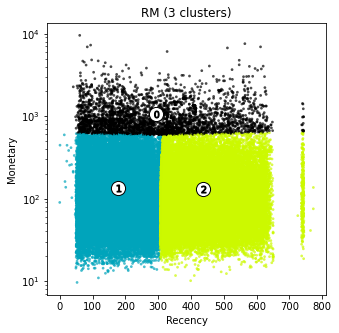

In [5]:
import matplotlib.pyplot as plt
from olist_commons import plot_clusters_2d
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.semilogy()
plot_clusters_2d(
    ax, f'RM ({n_clusters} clusters)',
    xy=[r, m], xy_labels=[r_label, m_label],
    xy_clu_centers=[r_centers, m_centers],
    clu_labels=clu_labels
)

##### Class labeling

In [6]:
from olist_commons import classes_labeling
import numpy as np
classes_def = {
    0: {'R': [0, np.inf], 'M': [600, np.inf]},
    1: {'R': [0, 300], 'M': [0, 600]},
    2: {'R': [300, np.inf], 'M': [0, 600]},
}
cla_labels = classes_labeling(crfm_1, classes_def)
display(cla_labels)

customer_unique_id
87ab9fec999db8bd5774917de3cdf01c    1
262e1f1e26e92e86375f86840b4ffd63    1
af5454198a97379394cacf676e1e96cb    1
634420a0ea42302205032ed44ac7fccc    1
9bb92bebd4cb7511e1a02d5e50bc4655    1
                                   ..
0eb1ee9dba87f5b36b4613a65074337c    2
830d5b7aaa3b6f1e9ad63703bec97d23    2
009b0127b727ab0ba422f6d9604487c7    2
4854e9b3feff728c13ee5fc7d1547e92    2
b7d76e111c89f7ebf14761390f0f7d17    2
Name: label, Length: 96093, dtype: int64

#### Class centers

Les centres sont les barycentres, d'où le nom de l'algorithme.

Réalisation de la fonction et test sur les clusters, puis application aux classes.

In [8]:
crfm_clu_labeled = pd.concat([
    pd.Series(clu_labels, index=crfm_1.index, name='k_clu'),
    crfm_1
], axis=1)
display(crfm_clu_labeled)

,k_clu,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,1,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,1,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,1,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,1,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,1,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,2,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,2,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,2,764.087488,1,40.95


In [9]:
cla_labels = classes_labeling(crfm_1, classes_def)
crfm_cla_labeled = pd.concat([
    pd.Series(cla_labels, index=crfm_1.index, name='k_cla'),
    crfm_1
], axis=1)
display(crfm_cla_labeled)

,k_cla,R,F,M
customer_unique_id,,,,
87ab9fec999db8bd5774917de3cdf01c,1,0.000000,1,89.71
262e1f1e26e92e86375f86840b4ffd63,1,0.884907,2,444.06
af5454198a97379394cacf676e1e96cb,1,13.940845,3,592.65
634420a0ea42302205032ed44ac7fccc,1,16.083437,2,160.76
9bb92bebd4cb7511e1a02d5e50bc4655,1,18.345312,1,137.03
...,...,...,...,...
0eb1ee9dba87f5b36b4613a65074337c,2,744.807245,1,109.34
830d5b7aaa3b6f1e9ad63703bec97d23,2,762.217824,1,0.00
009b0127b727ab0ba422f6d9604487c7,2,764.087488,1,40.95


In [10]:
clu_means = crfm_clu_labeled.groupby(by='k_clu').mean()
display(clu_means)

,R,F,M
k_clu,,,
0,292.188675,1.118765,1053.080748
1,177.455932,1.034112,135.732119
2,437.553144,1.027974,132.196006


In [11]:
display(clu_centers)

array([[2.92086275e+02, 1.11860880e+00, 1.05360901e+03],
       [1.77459962e+02, 1.03411010e+00, 1.35754056e+02],
       [4.37561476e+02, 1.02799828e+00, 1.32214435e+02]])

In [14]:
cla_means = crfm_cla_labeled.groupby(by='k_cla').mean()
display(cla_means)
display(cla_means.values)
cla_centers = cla_means.values

,R,F,M
k_cla,,,
0,294.731177,1.119034,1049.823771
1,174.579252,1.034057,135.252236
2,433.399398,1.028146,132.599166


array([[2.94731177e+02, 1.11903359e+00, 1.04982377e+03],
       [1.74579252e+02, 1.03405709e+00, 1.35252236e+02],
       [4.33399398e+02, 1.02814578e+00, 1.32599166e+02]])

In [15]:
rfm_centers = r_centers, f_centers, m_centers = (
    cla_centers[:, 0],
    cla_centers[:, 1],
    cla_centers[:, 2],
) 

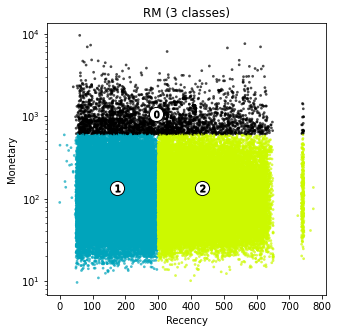

In [16]:
import matplotlib.pyplot as plt
from olist_commons import plot_clusters_2d
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plt.semilogy()
plot_clusters_2d(
    ax, f'RM ({n_clusters} classes)',
    xy=[r, m], xy_labels=[r_label, m_label],
    xy_clu_centers=[r_centers, m_centers],
    clu_labels=cla_labels
)

### Intégration en une fonction unique

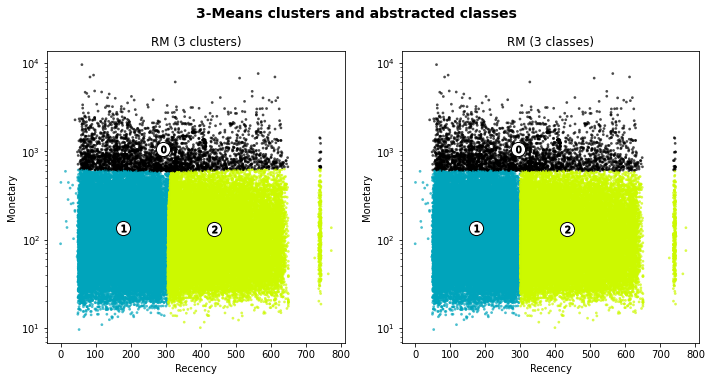

In [25]:
def get_centers(crfm, cl_labels):
    crfm_cl_labeled = pd.concat([
        pd.Series(cl_labels, index=crfm.index, name='k_cl'),
        crfm
    ], axis=1)
    cl_means = crfm_cl_labeled.groupby(by='k_cl').mean()
    cl_centers = cl_means.values
    return (
        cl_centers[:, 0],
        cl_centers[:, 1],
        cl_centers[:, 2],
    ) 

def plot_kmeans_rfm_clusters_and_classes(
        crfm, rfm_labels,
        clu_labels, cla_labels
):
    n_cl = len(np.unique(clu_labels))
    r, f, m = crfm.R, crfm.F, crfm.M
    r_label, m_label = rfm_labels[0], rfm_labels[2]
    clu_r_centers, _, clu_m_centers = get_centers(crfm, clu_labels)
    cla_r_centers, _, cla_m_centers = get_centers(crfm, cla_labels)

    fig = plt.figure(figsize=(10, 5))

    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax2 = plt.subplot2grid((1, 2), (0, 1))

    ax1.semilogy()
    plot_clusters_2d(
        ax1, f'RM ({n_cl} clusters)',
        xy=[r, m], xy_labels=[r_label, m_label],
        xy_clu_centers=[clu_r_centers, clu_m_centers],
        clu_labels=clu_labels
    )
    ax2.semilogy()
    plot_clusters_2d(
        ax2, f'RM ({n_cl} classes)',
        xy=[r, m], xy_labels=[r_label, m_label],
        xy_clu_centers=[cla_r_centers, cla_m_centers],
        clu_labels=cla_labels
    )

    plt.tight_layout()

    plt.suptitle(
        f'{n_cl}-Means clusters and abstracted classes',
        fontsize=14,
        fontweight='bold',
        y=1.05,
    )
    plt.show()

plot_kmeans_rfm_clusters_and_classes(
        crfm_1, rfm_labels,
        clu_labels, cla_labels
)

# Géo représentation et retour aux features

Reprise du code développé sur le projet Seattle

,n,n_u,n_na,fr,vr
geolocation,,,,,
geolocation_zip_code_prefix,1000163,19015,0,1.0,0.019012
geolocation_lat,1000163,717360,0,1.0,0.717243
geolocation_lng,1000163,717613,0,1.0,0.717496
geolocation_city,1000163,8011,0,1.0,0.008010
geolocation_state,1000163,27,0,1.0,0.000027


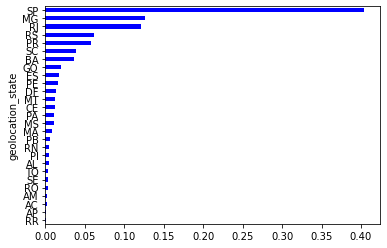

In [1]:
from olist_commons import get_geolocation, discrete_stats, plot_value_freqs
geolocation = get_geolocation()
display(discrete_stats(geolocation, 'geolocation'))
plot_value_freqs(geolocation, 'geolocation_state')

In [2]:
geolocation.columns = ['zip_code_prefix', 'lat', 'lng', 'city', 'state']
display(geolocation)

,zip_code_prefix,lat,lng,city,state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.64482,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


Toutes les localisations :

Cela fait immédiatement ressortir la concentration d'abord sur l'Amérique latine, puis à l'international sur quelques zones de la sphère linguistique espagnole / portugais : à vérifier.

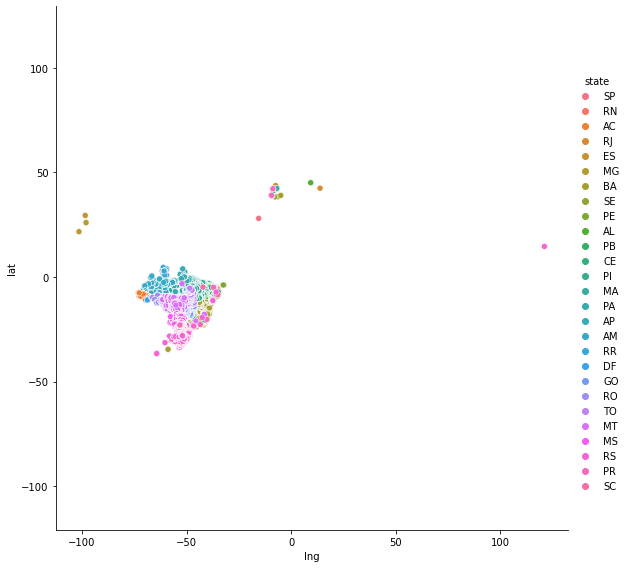

In [15]:
#import matplotlib.image as mpimg
#img = mpimg.imread('../img/seattle_map.png')
#f, ax = plt.subplots()
#plt.imshow(img, zorder=.5)
import matplotlib.pyplot as plt
import seaborn as sns
plot = sns.relplot(
    x='lng',
    y='lat',
    hue='state',
    data=geolocation,
    height=8)
#plot.axes[0, 0].imshow(img, alpha=.5, zorder=1)
plt.axis('equal')
plt.show()

Zoom sur l'Amérique Latine :

* https://en.wikipedia.org/wiki/Latin_America
* https://en.wikipedia.org/wiki/South_America
* https://en.wikipedia.org/wiki/Brazil
* https://en.wikipedia.org/wiki/Regions_of_Brazil
* https://en.wikipedia.org/wiki/Federative_units_of_Brazil

Direct scraping of https://en.wikipedia.org/wiki/Federative_units_of_Brazil#List

Certains points sot manisfestement mal classés : un kNN permettrait une détection et correction relativement sûre des anomalies.

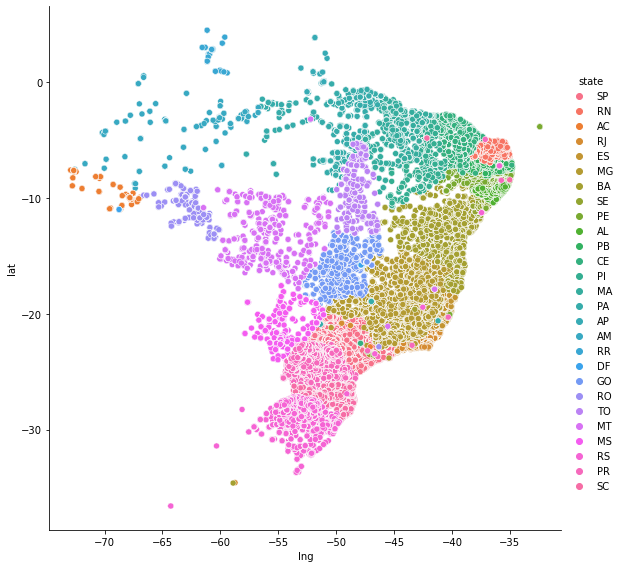

In [16]:
import seaborn as sns
from olist_commons import select_region
south_america = select_region(geolocation, (-75, -25), (-45, 10))
sns.relplot(x='lng', y='lat', hue='state', data=south_america, height=8)
plt.axis('equal')
plt.show()

Scraping

https://medium.com/analytics-vidhya/web-scraping-a-wikipedia-table-into-a-dataframe-c52617e1f451

In [18]:
from olist_commons import get_brazil_states
states = get_brazil_states()
display(states)

,Flag and name,Code,Capital,Largest city,Area(km2)[20],Population(2022)[21],"Density (perkm2, 2022)","GDP (R$millions, 2022)[22]",HDI(2022)[23]
0,Acre,AC,Rio Branco,Rio Branco,164123,892000,6.34,21000,0.719
1,Alagoas,AL,Maceió,Maceió,27779,3345000,125.52,73000,0.683
2,Amapá,AP,Macapá,Macapá,142829,845000,2.63,9000,0.740
3,Amazonas,AM,Manaus,Manaus,1559159,4156000,2.58,103000,0.733
4,Bahia,BA,Salvador,Salvador,564733,14942000,30.52,257000,0.714
5,Ceará,CE,Fortaleza,Fortaleza,148921,8870000,60.33,157000,0.735
6,Distrito Federal,DF,Brasília,Brasília,5780,3135000,493.00,249000,0.850
7,Espírito Santo,ES,Vitória,Serra,46095,3982000,80.63,125000,0.772
8,Goiás,GO,Goiânia,Goiânia,340112,7116000,18.46,202000,0.769
9,Maranhão,MA,São Luís,São Luís,331937,7134000,19.03,102000,0.687


Etiquettes complètes des états et classement par ordre décroissant de population

In [20]:
pop_col = states.columns[5]
states = states.sort_values(by=pop_col, ascending=False)
display(states)

,Flag and name,Code,Capital,Largest city,Area(km2)[20],Population(2022)[21],"Density (perkm2, 2022)","GDP (R$millions, 2022)[22]",HDI(2022)[23]
24,São Paulo,SP,São Paulo,São Paulo,248223,46004000,175.73,1964000,0.826
12,Minas Gerais,MG,Belo Horizonte,Belo Horizonte,586522,21212000,31.72,583000,0.787
18,Rio de Janeiro,RJ,Rio de Janeiro,Rio de Janeiro,43780,17309000,387.46,693000,0.796
4,Bahia,BA,Salvador,Salvador,564733,14942000,30.52,257000,0.714
15,Paraná,PR,Curitiba,Curitiba,199308,11515000,43.46,417000,0.792
20,Rio Grande do Sul,RS,Porto Alegre,Porto Alegre,281730,11407000,36.84,444000,0.787
16,Pernambuco,PE,Recife,Recife,98148,9599000,103.83,201000,0.727
5,Ceará,CE,Fortaleza,Fortaleza,148921,8870000,60.33,157000,0.735
13,Pará,PA,Belém,Belém,1247955,8623000,7.02,156000,0.698
23,Santa Catarina,SC,Florianópolis,Joinville,95736,7175000,69.74,293000,0.808


In [37]:
st = states[states.columns[0:2]]
dict_map = {list(r[1])[1]: list(r[1])[0] for r in st.iterrows()}
state_name = geolocation.state.map(dict_map).rename('state_name')
display(state_name)
display(state_name.value_counts())

0                  São Paulo
1                  São Paulo
2                  São Paulo
3                  São Paulo
4                  São Paulo
                 ...        
1000158    Rio Grande do Sul
1000159    Rio Grande do Sul
1000160    Rio Grande do Sul
1000161    Rio Grande do Sul
1000162    Rio Grande do Sul
Name: state_name, Length: 1000163, dtype: object

São Paulo              404268
Minas Gerais           126336
Rio de Janeiro         121169
Rio Grande do Sul       61851
Paraná                  57859
Santa Catarina          38328
Bahia                   36045
Goiás                   20139
Espírito Santo          16748
Pernambuco              16432
Distrito Federal        12986
Mato Grosso             12031
Ceará                   11674
Pará                    10853
Mato Grosso do Sul      10431
Maranhão                 7853
Paraíba                  5538
Rio Grande do Norte      5041
Piauí                    4549
Alagoas                  4183
Tocantins                3576
Sergipe                  3563
Rondônia                 3478
Amazonas                 2432
Acre                     1301
Amapá                     853
Roraima                   646
Name: state_name, dtype: int64

In [38]:
geolocation_stnames = pd.concat([geolocation, state_name], axis=1)
display(geolocation_stnames)

,zip_code_prefix,lat,lng,city,state,state_name
0,1037,-23.545621,-46.639292,sao paulo,SP,São Paulo
1,1046,-23.546081,-46.64482,sao paulo,SP,São Paulo
2,1046,-23.546129,-46.642951,sao paulo,SP,São Paulo
3,1041,-23.544392,-46.639499,sao paulo,SP,São Paulo
4,1035,-23.541578,-46.641607,sao paulo,SP,São Paulo
...,...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS,Rio Grande do Sul
1000159,99900,-27.877125,-52.224882,getulio vargas,RS,Rio Grande do Sul
1000160,99950,-28.071855,-52.014716,tapejara,RS,Rio Grande do Sul
1000161,99980,-28.388932,-51.846871,david canabarro,RS,Rio Grande do Sul


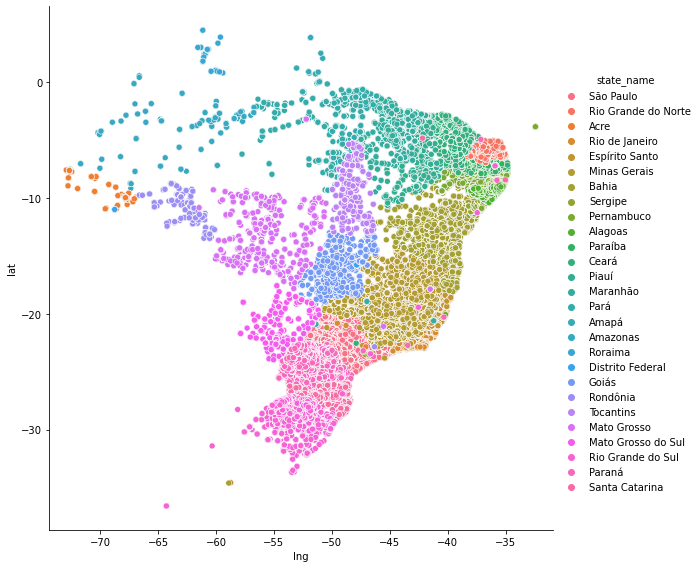

In [39]:
import seaborn as sns
from olist_commons import select_region
south_america = select_region(geolocation_stnames, (-75, -25), (-45, 10))
sns.relplot(x='lng', y='lat', hue='state_name', data=south_america, height=8)
plt.axis('equal')
plt.show()

Ventes hors Brésil

Le problème, c'est que les étiquettes correspondent bien à des états brésiliens.

Il s'agit donc soit :
* d'erreurs de géolocalisation : mauvaises coordonnées GPS
* d'erreurs consistant à donner un label d'état brésilien à défaut d'autre label disponible pour désigner d'autres régions du monde

Par exemple 513631	28165	41.614052	-8.411675	vila nova de campos	RJ

correspond à une localisation au portugal (Lago) : https://www.openstreetmap.org/#map=9/41.6141/-8.4117

On en déduit que la localité indiquée peut être découplée des coordonnées, probablement parce que la personne déclare son lieu de résidence (où recevoir la facture) au moment de son achat, mais que la coordonnées enregistrée est celle du lieu d'où est passée la commande. Dans la majorité des cas, cela coïncide, mais cela diverge pour les personnes en déplacement au moment de leur achat.

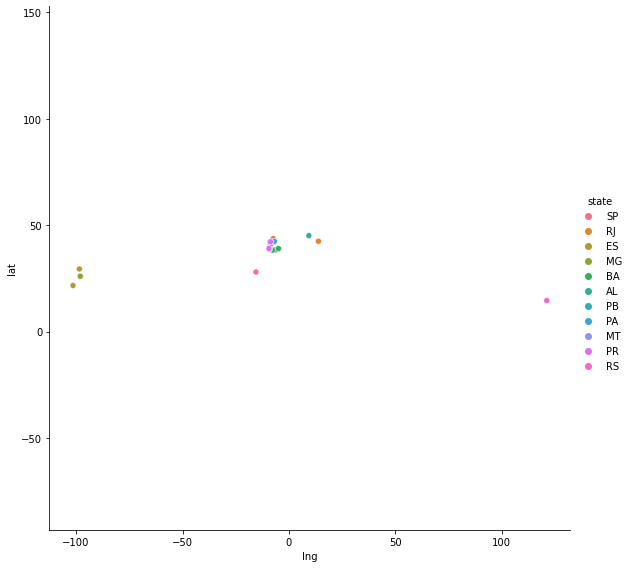

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from olist_commons import select_outof_region
outof_south_america = select_outof_region(geolocation, (-75, -25), (-45, 10))
sns.relplot(x='lng', y='lat', hue='state', data=outof_south_america, height=8)
plt.axis('equal')
plt.show()

In [7]:
display(outof_south_america)

,zip_code_prefix,lat,lng,city,state
387565,18243,28.008978,-15.536867,bom retiro da esperanca,SP
513631,28165,41.614052,-8.411675,vila nova de campos,RJ
513754,28155,42.439286,13.820214,santa maria,RJ
514429,28333,38.381672,-6.3282,raposo,RJ
516682,28595,43.684961,-7.41108,portela,RJ
538512,29654,29.409252,-98.484121,santo antônio do canaã,ES
538557,29654,21.657547,-101.466766,santo antonio do canaa,ES
585242,35179,25.995203,-98.078544,santana do paraíso,MG
585260,35179,25.995245,-98.078533,santana do paraiso,MG
695377,45936,38.323939,-6.775035,itabatan,BA


La connaissance des lieux de résidence, voire des quartiers peut conduire à des clusters pertinents dans la mesure, et c'est particulièrement vrai au Brésil, où les inégalités sont fortes, et où il y a une ségrégation territoriale forte des populations en fonction de leur catégorie CSP. A explorer donc plus avant, en commençant par des statistiques de CA, et de CA par client en fonction des territoires (donc des labels connus), avant de s'en remettre au clustering.

Au niveau du clustering, la géolocalisation nous semble une indication moins pertinente qu'un indicateur de type indice CSP territorial qui traduit la capacité économique des clients suivant leur territoire (applicables sur n niveaux de granulatité territoriale)

NEXT

Ciblage par ville, par pays, etc : granularités territoriales

Abstraction : simplement par arrondi des coordonnées => sns permet de représenter la densité de différentes manières

Le must serait d'en profiter pour reprendre mon investigation des librairies geodata

# A propos de PEP8 (*Python Enhancement Proposal*)

Doc:
* **PEP 8 — the Style Guide for Python Code** [https://pep8.org/](https://pep8.org/)
* ⇒ **PEP 8 – Style Guide for Python Code** [https://peps.python.org/pep-0008/](https://peps.python.org/pep-0008/)
* ✔ **How to Write Beautiful Python Code With PEP 8** [https://realpython.com/python-pep8/](https://realpython.com/python-pep8/)
* **Geeks 4 Geeks - Python – Conventions and PEP8** [https://www.geeksforgeeks.org/python-conventions-and-pep8/](https://www.geeksforgeeks.org/python-conventions-and-pep8/)
* [https://www.datacamp.com/tutorial/pep8-tutorial-python-code](https://www.datacamp.com/tutorial/pep8-tutorial-python-code)

Compl. :
* https://realpython.com/python-code-quality/
* https://realpython.com/documenting-python-code
    * https://realpython.com/documenting-python-code/#documenting-your-python-code-base-using-docstrings


Tools :
* **https://code.visualstudio.com/docs/python/linting



# Arités

quel but ?

combien d'order_reviews pour un order, et inversement ?

passage à l'échelle : toutes les arités pour toutes les relations intertables

Joli tableau synthétique bien clair en sortie.

En profiter pour revenir sur l'incorporation des order_reviews dans la grande jointure.

En dériver une feature supplémentaire cf. milestones

## Cas 1 pour mise au point : order_review | order

Rappels :

,n,n_u,n_na,fr,vr
order_reviews,,,,,
review_id,99224,98410,0,1.000000,0.991796
order_id,99224,98673,0,1.000000,0.994447
review_score,99224,5,0,1.000000,0.000050
review_comment_title,11568,4527,87656,0.116585,0.391338
review_comment_message,40977,36159,58247,0.412975,0.882422
review_creation_date,99224,636,0,1.000000,0.006410
review_answer_timestamp,99224,98248,0,1.000000,0.990164


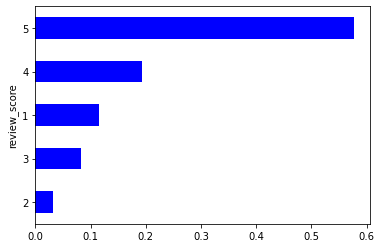

In [1]:
from pepper_commons import plot_value_freqs, discrete_stats
from olist_commons import get_order_reviews
order_reviews = get_order_reviews()
display(discrete_stats(order_reviews, 'order_reviews'))
plot_value_freqs(order_reviews, 'review_score')

,n,n_u,n_na,fr,vr
orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
customer_id,99441,99441,0,1.000000,1.000000
order_status,99441,8,0,1.000000,0.000080
order_purchase_timestamp,99441,98875,0,1.000000,0.994308
order_approved_at,99281,90733,160,0.998391,0.913901
order_delivered_carrier_date,97658,81018,1783,0.982070,0.829609
order_delivered_customer_date,96476,95664,2965,0.970183,0.991583
order_estimated_delivery_date,99441,459,0,1.000000,0.004616


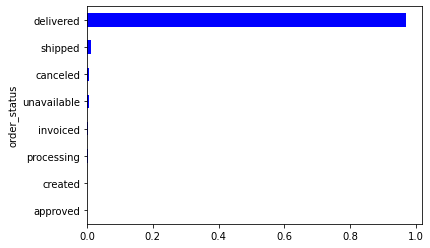

In [2]:
from pepper_commons import plot_value_freqs, discrete_stats
from olist_commons import get_orders
orders = get_orders()
display(discrete_stats(orders, 'orders'))
plot_value_freqs(orders, 'order_status')

In [3]:
from olist_commons import display_relation_arities
display_relation_arities(order_reviews, orders, 'review_id', 'order_id', verbose=True)

relation arites : [order_reviews](0..3)--(1..3)[orders]


review_id by order_id,sum,1,2,3
count,98673.0,98126.000000,543.000000,4.000000
freq,1.0,0.994456,0.005503,0.000041


order_id by review_id,sum,1,2,3
count,98410.0,97621.000000,764.000000,25.000000
freq,1.0,0.991983,0.007763,0.000254


Quels sont les cas à 3 ?

In [4]:
from olist_commons import count_of_objets_A_by_objet_B
cf, details = count_of_objets_A_by_objet_B(order_reviews, 'order_id', 'review_id')
arity_3_index = details[details.order_id == 3].index
arity_3_order_reviews = order_reviews.set_index('review_id')
display(arity_3_order_reviews.loc[arity_3_index])

order_reviews,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
review_id,,,,,,
08528f70f579f0c830189efc523d2182,7813842ae95e8c497fc0233232ae815a,1,Produto errado,Entrega do produto diferente do solicitado\r\n...,2018-08-03 00:00:00,2018-08-06 00:09:52
08528f70f579f0c830189efc523d2182,03310aa823a66056268a3bab36e827fb,1,Produto errado,Entrega do produto diferente do solicitado\r\n...,2018-08-03 00:00:00,2018-08-06 00:09:52
08528f70f579f0c830189efc523d2182,53c71d3953507c6239ff73917ed358c9,1,Produto errado,Entrega do produto diferente do solicitado\r\n...,2018-08-03 00:00:00,2018-08-06 00:09:52
0c76e7a547a531e7bf9f0b99cba071c1,3525e0e57f9d276d522d570bd46cb39c,5,NaN,NaN,2017-08-31 00:00:00,2017-09-05 15:27:17
0c76e7a547a531e7bf9f0b99cba071c1,98c977c116f7779360e9fecffd3860b6,5,NaN,NaN,2017-08-31 00:00:00,2017-09-05 15:27:17
...,...,...,...,...,...,...
e44840754f12fad2b8646712121b349a,57cc72d3e635bf57199d76328279b875,4,NaN,NaN,2017-11-01 00:00:00,2017-11-02 00:11:06
e44840754f12fad2b8646712121b349a,6ceabf34d230c31f161988dd2ff8fa92,4,NaN,NaN,2017-11-01 00:00:00,2017-11-02 00:11:06
f4bb9d6dd4fb6dcc2298f0e7b17b8e1e,7791eb26e081ed5f8dd15b40c45393a3,4,NaN,NaN,2018-03-29 00:00:00,2018-03-30 00:29:09


Delivery of the product different from the requested one\r\nI await guidance for the exchange :

In [6]:
review = arity_3_order_reviews[arity_3_order_reviews.order_id == '7813842ae95e8c497fc0233232ae815a']
display(review.review_comment_message.values)

array(['Entrega do produto diferente do solicitado\r\nAguardo orientação para a troca'],
      dtype=object)

Il y a seulement 768 commandes (0,8 %) qui n'ont pas été évaluées.

99,2 % des commandes ont donc une appréciation.

Cela fait donc de l'appréciation une caractéristique, sinon pertinente, au moins intéressante.

In [5]:
from olist_commons import print_out_of_intersection
print_out_of_intersection(order_reviews, orders, 'order_id')

|order_reviews.order_id| : 98673
|orders.order_id| : 99441
|order_reviews.order_id \ orders.order_id| : 0 (0.0%)
|orders.order_id \ order_reviews.order_id| : 768 (0.8%)


## Passage à l'échelle : toutes les arités

### Cas 2 : order_item | product

,n,n_u,n_na,fr,vr
order_items,,,,,
order_id,112650,98666,0,1.0,0.875863
order_item_id,112650,21,0,1.0,0.000186
product_id,112650,32951,0,1.0,0.292508
seller_id,112650,3095,0,1.0,0.027474
shipping_limit_date,112650,93318,0,1.0,0.828389
price,112650,5968,0,1.0,0.052978
freight_value,112650,6999,0,1.0,0.062130


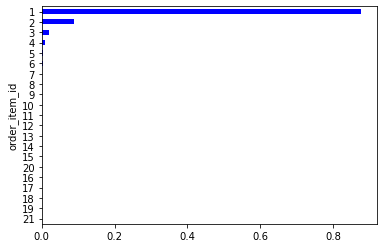

In [8]:
from pepper_commons import plot_value_freqs, discrete_stats
from olist_commons import get_order_items
order_items = get_order_items()
display(discrete_stats(order_items, 'order_items'))
plot_value_freqs(order_items, 'order_item_id')

In [9]:
from pepper_commons import plot_value_freqs, discrete_stats
from olist_commons import get_products
products = get_products()
display(discrete_stats(products, 'products'))

,n,n_u,n_na,fr,vr
products,,,,,
product_id,32951,32951,0,1.000000,1.000000
product_category_name,32341,73,610,0.981488,0.002257
product_name_lenght,32341,66,610,0.981488,0.002041
product_description_lenght,32341,2960,610,0.981488,0.091525
product_photos_qty,32341,19,610,0.981488,0.000587
product_weight_g,32949,2204,2,0.999939,0.066891
product_length_cm,32949,99,2,0.999939,0.003005
product_height_cm,32949,102,2,0.999939,0.003096
product_width_cm,32949,95,2,0.999939,0.002883


In [10]:
from olist_commons import print_out_of_intersection
print_out_of_intersection(order_items, products, 'product_id')

|order_items.product_id| : 32951
|products.product_id| : 32951
|order_items.product_id \ products.product_id| : 0 (0.0%)
|products.product_id \ order_items.product_id| : 0 (0.0%)


In [12]:
from olist_commons import display_relation_arities
display_relation_arities(order_items, products, 'order_id', 'product_id', verbose=True)

relation arites : [order_items](1..527)--(1..21)[products]


order_id by product_id,sum,1,2,3,4,5,6,7,8,9,...,155,51,146,118,373,323,77,114,197,154
count,32951.0,18117.000000,5817.000000,2651.000000,1534.000000,994.000000,736.000000,515.000000,379.000000,289.000000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
freq,1.0,0.549816,0.176535,0.080453,0.046554,0.030166,0.022336,0.015629,0.011502,0.008771,...,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003


product_id by order_id,sum,1,2,3,4,5,6,7,8,10,12,11,9,15,14,20,13,21
count,98666.0,88863.000000,7516.000000,1322.000000,505.000000,204.000000,198.000000,22.000000,8.000000,8.000000,5.000000,4.000000,3.00000,2.00000,2.00000,2.00000,1.00000,1.00000
freq,1.0,0.900645,0.076176,0.013399,0.005118,0.002068,0.002007,0.000223,0.000081,0.000081,0.000051,0.000041,0.00003,0.00002,0.00002,0.00002,0.00001,0.00001


Ici, il est évident que raisonner sur `order_id` comme PK est inadapté.

La PK est la composée de `order_id` et `order_item_id`

Démonstration :

In [13]:
pk = order_items.order_id.astype(str) + order_items.order_item_id.astype(str)
pku = pk.unique()
display(len(pku))

112650

Extension de la table `order_items` avec la PK (raison pratique : pour éviter de modifier les fonctions pour prendre en compte une 2-pk) :

In [14]:
order_items.insert(0, 'ooi_id', pk)
display(order_items)

order_items,ooi_id,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb162141,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd31,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e1,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87
3,00024acbcdf0a6daa1e931b038114c751,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd91,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a0371,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb1,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.0,36.53
112647,fffce4705a9662cd70adb13d4a31832d1,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.9,16.95
112648,fffe18544ffabc95dfada21779c9644f1,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


On refait le calcul :
* un order_item est associé a un produit et un seul
* le produit le plus vendu a été vendu 527 fois
* 55 % des produits n'ont été vendus qu'une fois, 17 % 2 fois, ..

In [15]:
from olist_commons import display_relation_arities
display_relation_arities(order_items, products, 'ooi_id', 'product_id', verbose=True)

relation arites : [order_items](1..527)--(1..1)[products]


ooi_id by product_id,sum,1,2,3,4,5,6,7,8,9,...,155,51,146,118,373,323,77,114,197,154
count,32951.0,18117.000000,5817.000000,2651.000000,1534.000000,994.000000,736.000000,515.000000,379.000000,289.000000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
freq,1.0,0.549816,0.176535,0.080453,0.046554,0.030166,0.022336,0.015629,0.011502,0.008771,...,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003,0.00003


product_id by ooi_id,sum,1
count,112650.0,112650.0
freq,1.0,1.0


produits jamais vendus ? 0 (0 %)

Tous les produits référencés ont été vendus au moins une fois.

NB > la fréquence de vente d'un produit = sa popularité peut devenir une feature pertinente pour la segmentation des utilisateurs : on peut construire une note pour savoir si l'utilisateur achète des produits populaires ou non. A voir..

### Cas 3 : order_item | order

* 90 % des commandes ne comprennent qu'un produit, 7 % deux
* la plus longue commande comporte 21 produits
* **Il est surprenant de découvrir 775 (0,008 %) commandes sans item.** On peut tracer le chiffre d'affaire lié à ces commandes ainsi que les dates et délais des traitements, mais pas les rattacher à un produit et vendeur en particulier.

,n,n_u,n_na,fr,vr
orders,,,,,
order_id,99441,99441,0,1.000000,1.000000
customer_id,99441,99441,0,1.000000,1.000000
order_status,99441,8,0,1.000000,0.000080
order_purchase_timestamp,99441,98875,0,1.000000,0.994308
order_approved_at,99281,90733,160,0.998391,0.913901
order_delivered_carrier_date,97658,81018,1783,0.982070,0.829609
order_delivered_customer_date,96476,95664,2965,0.970183,0.991583
order_estimated_delivery_date,99441,459,0,1.000000,0.004616


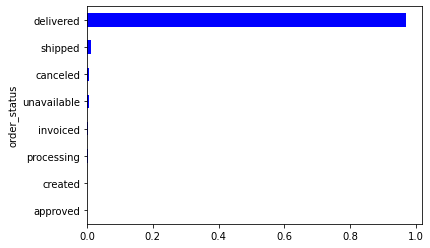

In [16]:
from pepper_commons import plot_value_freqs, discrete_stats
from olist_commons import get_orders
orders = get_orders()
display(discrete_stats(orders, 'orders'))
plot_value_freqs(orders, 'order_status')

In [10]:
from olist_commons import print_out_of_intersection
print_out_of_intersection(order_items, orders, 'order_id')

|order_items.order_id| : 98666
|orders.order_id| : 99441
|order_items.order_id \ orders.order_id| : 0 (0.0%)
|orders.order_id \ order_items.order_id| : 775 (0.8%)


In [17]:
from olist_commons import display_relation_arities
display_relation_arities(order_items, orders, 'ooi_id', 'order_id', verbose=True)

relation arites : [order_items](0..21)--(1..1)[orders]


ooi_id by order_id,sum,1,2,3,4,5,6,7,8,10,12,11,9,15,14,20,13,21
count,98666.0,88863.000000,7516.000000,1322.000000,505.000000,204.000000,198.000000,22.000000,8.000000,8.000000,5.000000,4.000000,3.00000,2.00000,2.00000,2.00000,1.00000,1.00000
freq,1.0,0.900645,0.076176,0.013399,0.005118,0.002068,0.002007,0.000223,0.000081,0.000081,0.000051,0.000041,0.00003,0.00002,0.00002,0.00002,0.00001,0.00001


order_id by ooi_id,sum,1
count,112650.0,112650.0
freq,1.0,1.0


### Cas 4 : order_item | seller

* un order_item est associé a un vendeur et un seul
* le meilleur vendeur a vendu 2 033 fois
* 16 % des vendeurs ont vendu une fois, 10 % deux fois, 7 % trois fois, ..

In [12]:
from pepper_commons import plot_value_freqs, discrete_stats
from olist_commons import get_sellers
sellers = get_sellers()
display(discrete_stats(sellers, 'sellers'))

,n,n_u,n_na,fr,vr
sellers,,,,,
seller_id,3095,3095,0,1.0,1.000000
seller_zip_code_prefix,3095,2246,0,1.0,0.725687
seller_city,3095,611,0,1.0,0.197415
seller_state,3095,23,0,1.0,0.007431


In [13]:
from olist_commons import print_out_of_intersection
print_out_of_intersection(order_items, sellers, 'seller_id')

|order_items.seller_id| : 3095
|sellers.seller_id| : 3095
|order_items.seller_id \ sellers.seller_id| : 0 (0.0%)
|sellers.seller_id \ order_items.seller_id| : 0 (0.0%)


In [17]:
from olist_commons import display_relation_arities
display_relation_arities(order_items, sellers, 'ooi_id', 'seller_id')

relation arites : [order_items](1..2033)--(1..1)[sellers]


ooi_id by seller_id,sum,1,2,3,4,5,7,6,8,11,...,2033,326,798,133,188,270,204,454,395,306
count,3095.0,509.000000,328.000000,212.000000,152.000000,142.00000,101.000000,99.000000,96.000000,82.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
freq,1.0,0.164459,0.105977,0.068498,0.049111,0.04588,0.032633,0.031987,0.031018,0.026494,...,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323,0.000323


seller_id by ooi_id,sum,1
count,112650.0,112650.0
freq,1.0,1.0


### Cas 5 : order_payment | order

Les paiements de commande ne disposent pas de clé primaire.

Tout commande payée correspond à une commande.

Mais il existe une commande (une seule) qui n'a pas été payée.

In [19]:
from olist_commons import get_order_payments
order_payments = get_order_payments()
display(discrete_stats(order_payments, 'order_payments'))

,n,n_u,n_na,fr,vr
order_payments,,,,,
order_id,103886,99440,0,1.0,0.957203
payment_sequential,103886,29,0,1.0,0.000279
payment_type,103886,5,0,1.0,0.000048
payment_installments,103886,24,0,1.0,0.000231
payment_value,103886,29077,0,1.0,0.279893


In [117]:
print_out_of_intersection(order_payments, orders, 'order_id')

|order_payments.order_id| : 99440
|orders.order_id| : 99441
|order_payments.order_id \ orders.order_id| : 0 (0.0%)
|orders.order_id \ order_payments.order_id| : 1 (0.0%)


Ici, il est évident que raisonner sur `order_id` comme PK est inadapté.

La PK est la composée de `order_id` et `payment_sequential`

Démonstration :

In [20]:
pk = order_payments.order_id.astype(str) + order_payments.payment_sequential.astype(str)
pku = pk.unique()
display(len(pku))

103886

Extension de la table `order_payments` avec la PK (raison pratique : pour éviter de modifier les fonctions pour prendre en compte une 2-pk) :

In [21]:
order_payments.insert(0, 'ops_id', pk)
display(order_payments)

order_payments,ops_id,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d171,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa01,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd1,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab9531,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a1,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c1,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f1,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.8
103883,32609bbb3dd69b3c066a6860554a77bf1,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e101,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [22]:
from olist_commons import display_relation_arities
display_relation_arities(order_payments, orders, 'ops_id', 'order_id', verbose=True)

relation arites : [order_payments](0..29)--(1..1)[orders]


ops_id by order_id,sum,1,2,3,4,5,6,7,8,9,...,12,10,13,15,14,19,22,21,26,29
count,99440.0,96479.000000,2382.000000,301.000000,108.000000,52.000000,36.000000,28.000000,11.000000,9.000000,...,8.00000,5.00000,3.00000,2.00000,2.00000,2.00000,1.00000,1.00000,1.00000,1.00000
freq,1.0,0.970223,0.023954,0.003027,0.001086,0.000523,0.000362,0.000282,0.000111,0.000091,...,0.00008,0.00005,0.00003,0.00002,0.00002,0.00002,0.00001,0.00001,0.00001,0.00001


order_id by ops_id,sum,1
count,103886.0,103886.0
freq,1.0,1.0


### Cas 6 : customer | order

,n,n_u,n_na,fr,vr
customers,,,,,
customer_id,99441,99441,0,1.0,1.000000
customer_unique_id,99441,96096,0,1.0,0.966362
customer_zip_code_prefix,99441,14994,0,1.0,0.150783
customer_city,99441,4119,0,1.0,0.041422
customer_state,99441,27,0,1.0,0.000272


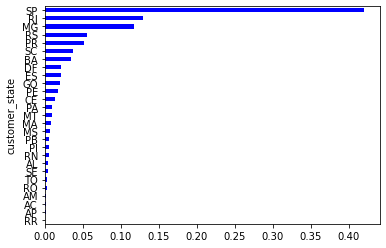

customers,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [27]:
from olist_commons import get_customers
customers = get_customers()
display(discrete_stats(customers, 'customers'))
plot_value_freqs(customers, 'customer_state')
display(customers)

In [28]:
from olist_commons import print_out_of_intersection
print_out_of_intersection(customers, orders, 'customer_id')

|customers.customer_id| : 99441
|orders.customer_id| : 99441
|customers.customer_id \ orders.customer_id| : 0 (0.0%)
|orders.customer_id \ customers.customer_id| : 0 (0.0%)


In [29]:
from olist_commons import display_relation_arities
display_relation_arities(customers, orders, 'customer_unique_id', 'customer_id', verbose=True)

relation arites : [customers](1..1)--(1..17)[orders]


customer_unique_id by customer_id,sum,1
count,99441.0,99441.0
freq,1.0,1.0


customer_id by customer_unique_id,sum,1,2,3,4,5,6,7,9,17
count,96096.0,93099.000000,2745.000000,203.000000,30.000000,8.000000,6.000000,3.000000,1.00000,1.00000
freq,1.0,0.968812,0.028565,0.002112,0.000312,0.000083,0.000062,0.000031,0.00001,0.00001


### Cas 7 : product | category

3 catégories de produits utilisées dans la table des produits sont absents de la table des catégories.

toutes les catégories de la table des catégories sont associées à au moins un produit de la table des produits.

In [31]:
from olist_commons import get_cats
cats = get_cats()
display(discrete_stats(cats, 'cats'))
display(cats.product_category_name_english)

,n,n_u,n_na,fr,vr
cats,,,,,
product_category_name,71,71,0,1.0,1.0
product_category_name_english,71,71,0,1.0,1.0


0                 health_beauty
1         computers_accessories
2                          auto
3                bed_bath_table
4               furniture_decor
                ...            
66                      flowers
67        arts_and_craftmanship
68          diapers_and_hygiene
69    fashion_childrens_clothes
70        security_and_services
Name: product_category_name_english, Length: 71, dtype: object

In [32]:
display(products)

products,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [33]:
from olist_commons import print_out_of_intersection
print_out_of_intersection(products, cats, 'product_category_name')

|products.product_category_name| : 74
|cats.product_category_name| : 71
|products.product_category_name \ cats.product_category_name| : 3 (4.1000000000000005%)
|cats.product_category_name \ products.product_category_name| : 0 (0.0%)


In [35]:
from olist_commons import display_relation_arities
display_relation_arities(products, cats, 'product_id', 'product_category_name', verbose=True)

relation arites : [products](1..3029)--(0..1)[cats]


product_id by product_category_name,sum,10,849,104,27,19,5,31,289,123,...,78,88,91,789,48,370,90,517,231,2335
count,73.0,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
freq,1.0,0.041096,0.027397,0.027397,0.027397,0.027397,0.027397,0.027397,0.013699,0.013699,...,0.013699,0.013699,0.013699,0.013699,0.013699,0.013699,0.013699,0.013699,0.013699,0.013699


product_category_name by product_id,sum,1,0
count,32951.0,32341.000000,610.000000
freq,1.0,0.981488,0.018512


Quelles sont les 3 catégories non référencées dans la table des catégories ?

portateis_cozinha_e_preparadores_de_alimentos = préparateurs de cuisine portables = portable kitchen food preparers

In [36]:
from olist_commons import out_of_intersection
(
    pk_A, pk_B, pk_A_not_B, pk_B_not_A
) = out_of_intersection(products, cats, 'product_category_name')
display(pk_A_not_B)

array(['nan', 'portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'],
      dtype='<U45')

In [43]:
p = products[products.product_category_name.isin(pk_A_not_B)]
display(p.product_category_name.value_counts())
print('#NA :', products.product_category_name.isna().sum())

portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: product_category_name, dtype: int64

#NA : 610


In [38]:
cats = cats.sort_values(by='product_category_name')
display(cats.head(41))
display(cats.tail(30))

cats,product_category_name,product_category_name_english
37,agro_industria_e_comercio,agro_industry_and_commerce
45,alimentos,food
10,alimentos_bebidas,food_drink
46,artes,art
67,artes_e_artesanato,arts_and_craftmanship
34,artigos_de_festas,party_supplies
54,artigos_de_natal,christmas_supplies
20,audio,audio
2,automotivo,auto
11,bebes,baby


cats,product_category_name,product_category_name_english
66,flores,flowers
68,fraldas_higiene,diapers_and_hygiene
44,industria_comercio_e_negocios,industry_commerce_and_business
1,informatica_acessorios,computers_accessories
41,instrumentos_musicais,musical_instruments
60,la_cuisine,la_cuisine
57,livros_importados,books_imported
48,livros_interesse_geral,books_general_interest
39,livros_tecnicos,books_technical
23,malas_acessorios,luggage_accessories


### Cas 8 : geolocation

In [44]:
from olist_commons import get_geolocation
geolocation = get_geolocation()
# display(discrete_stats(geolocation, 'geolocation'))
geolocation_scz_keys = geolocation[[
    'geolocation_state',
    'geolocation_city',
    'geolocation_zip_code_prefix'
]].copy().drop_duplicates()
geolocation_scz_keys.columns = ['state', 'city', 'zip_code']
display(geolocation_scz_keys)

,state,city,zip_code
0,SP,sao paulo,1037
1,SP,sao paulo,1046
3,SP,sao paulo,1041
4,SP,sao paulo,1035
5,SP,são paulo,1012
...,...,...,...
999806,RS,ibiaçá,99940
999846,RS,santa cecilia do sul,99952
999867,RS,ciríaco,99970
999891,RS,estação,99930


Sérendipité : la vérification de l'unicité des zip_code amène à découvrir par hasard un problème de feature engineering : les noms de ville n'ont pas été normalisés et sont multi-orthographiés.

Pour corriger le problème, il faut trouver un fichier normalisé donnant les associations zip-ville.

In [47]:
print(geolocation_scz_keys.zip_code.unique().shape[0])

19015


In [49]:
display(geolocation_scz_keys.zip_code.value_counts())
display(geolocation_scz_keys[geolocation_scz_keys.zip_code == 6900])

6900     5
17970    5
28950    5
13457    5
13455    5
        ..
40105    1
40240    1
40220    1
40255    1
99952    1
Name: zip_code, Length: 19015, dtype: int64

,state,city,zip_code
177377,SP,embu-guacu,6900
177379,SP,embu-guaçu,6900
177382,SP,embu guaçu,6900
177423,SP,embu guacu,6900
177502,SP,embuguacu,6900


Scraping

https://en.wikipedia.org/wiki/List_of_municipalities_of_Brazil

In [55]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# get the HTML content
url = 'https://en.wikipedia.org/wiki/List_of_municipalities_of_Brazil'
response = requests.get(url)
# print(response.status_code)

# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find_all('table', {'class': 'wikitable sortable'})

# turn it into dataframe
data_list = pd.read_html(str(table))

for data in data_list:
    display(data)

,Mesoregion,Microregion,Municipality
0,Vale do Acre,Brasiléia,Assis Brasil
1,Vale do Acre,Brasiléia,Brasiléia
2,Vale do Acre,Brasiléia,Epitaciolândia
3,Vale do Acre,Brasiléia,Xapuri
4,Vale do Acre,Rio Branco,Acrelândia
5,Vale do Acre,Rio Branco,Bujari
6,Vale do Acre,Rio Branco,Capixaba
7,Vale do Acre,Rio Branco,Plácido de Castro
8,Vale do Acre,Rio Branco,Porto Acre
9,Vale do Acre,Rio Branco,Rio Branco (State Capital)


,Mesoregion,Microregion,Municipality
0,Norte do Amapá,Amapá,Amapá
1,Norte do Amapá,Amapá,Pracuúba
2,Norte do Amapá,Amapá,Tartarugalzinho
3,Norte do Amapá,Oiapoque,Calçoene
4,Norte do Amapá,Oiapoque,Oiapoque
5,Sul do Amapá,Macapá,Cutias
6,Sul do Amapá,Macapá,Ferreira Gomes
7,Sul do Amapá,Macapá,Itaubal
8,Sul do Amapá,Macapá,Macapá (State Capital)
9,Sul do Amapá,Macapá,Pedra Branca do Amapari


,Mesoregion,Microregion,Municipality
0,Centro Amazonense,Coari,Anamã
1,Centro Amazonense,Coari,Anori
2,Centro Amazonense,Coari,Beruri
3,Centro Amazonense,Coari,Caapiranga
4,Centro Amazonense,Coari,Coari
...,...,...,...
57,Sul Amazonense,Madeira,Manicoré
58,Sul Amazonense,Madeira,Novo Aripuanã
59,Sul Amazonense,Purus,Canutama
60,Sul Amazonense,Purus,Lábrea


,Mesoregion,Microregion,Municipality
0,Baixo Amazonas,Almeirim,Almeirim
1,Baixo Amazonas,Almeirim,Porto de Moz
2,Baixo Amazonas,Óbidos,Faro
3,Baixo Amazonas,Óbidos,Juruti
4,Baixo Amazonas,Óbidos,Óbidos
...,...,...,...
139,Sudoeste Paraense,Itaituba,Itaituba
140,Sudoeste Paraense,Itaituba,Jacareacanga
141,Sudoeste Paraense,Itaituba,Novo Progresso
142,Sudoeste Paraense,Itaituba,Rurópolis


,Mesoregion,Microregion,Municipality
0,Leste Rondoniense,Alvorada d'Oeste,Alvorada d'Oeste
1,Leste Rondoniense,Alvorada d'Oeste,Nova Brasilândia d'Oeste
2,Leste Rondoniense,Alvorada d'Oeste,São Miguel do Guaporé
3,Leste Rondoniense,Alvorada d'Oeste,Seringueiras
4,Leste Rondoniense,Ariquemes,Alto Paraíso
5,Leste Rondoniense,Ariquemes,Ariquemes
6,Leste Rondoniense,Ariquemes,Cacaulândia
7,Leste Rondoniense,Ariquemes,Machadinho d'Oeste
8,Leste Rondoniense,Ariquemes,Monte Negro
9,Leste Rondoniense,Ariquemes,Rio Crespo


,Mesoregion,Microregion,Municipality
0,Norte de Roraima,Boa Vista,Alto Alegre
1,Norte de Roraima,Boa Vista,Amajari
2,Norte de Roraima,Boa Vista,Boa Vista (State Capital)
3,Norte de Roraima,Boa Vista,Pacaraima
4,Norte de Roraima,Nordeste de Roraima,Bonfim
5,Norte de Roraima,Nordeste de Roraima,Cantá
6,Norte de Roraima,Nordeste de Roraima,Normandia
7,Norte de Roraima,Nordeste de Roraima,Uiramutã
8,Sul de Roraima,Caracarai,Caracaraí
9,Sul de Roraima,Caracarai,Iracema


,Mesoregion,Microregion,Municipality
0,Ocidental do Tocantins,Araguaína,Aragominas
1,Ocidental do Tocantins,Araguaína,Araguaína
2,Ocidental do Tocantins,Araguaína,Araguanã
3,Ocidental do Tocantins,Araguaína,Arapoema
4,Ocidental do Tocantins,Araguaína,Babaçulândia
...,...,...,...
134,Oriental do Tocantins,Porto Nacional,Pedro Afonso
135,Oriental do Tocantins,Porto Nacional,Porto Nacional
136,Oriental do Tocantins,Porto Nacional,Santa Maria do Tocantins
137,Oriental do Tocantins,Porto Nacional,Silvanópolis


,Mesoregion,Microregion,Municipality
0,Agreste Alagoano,Arapiraca,Arapiraca
1,Agreste Alagoano,Arapiraca,Campo Grande
2,Agreste Alagoano,Arapiraca,Coité do Nóia
3,Agreste Alagoano,Arapiraca,Craíbas
4,Agreste Alagoano,Arapiraca,Feira Grande
...,...,...,...
97,Sertão Alagoano,Serrana do Sertão Alagoano,Água Branca
98,Sertão Alagoano,Serrana do Sertão Alagoano,Canapi
99,Sertão Alagoano,Serrana do Sertão Alagoano,Inhapi
100,Sertão Alagoano,Serrana do Sertão Alagoano,Mata Grande


,Mesoregion,Microregion,Municipality
0,Metropolitana de Salvador,Feira de Santana,Água Fria
1,Metropolitana de Salvador,Feira de Santana,Amélia Rodrigues
2,Metropolitana de Salvador,Feira de Santana,Anguera
3,Metropolitana de Salvador,Feira de Santana,Antônio Cardoso
4,Metropolitana de Salvador,Feira de Santana,Conceição da Feira
...,...,...,...
412,Vale São-Franciscano da Bahia,Paulo Afonso,Chorrochó
413,Vale São-Franciscano da Bahia,Paulo Afonso,Glória
414,Vale São-Franciscano da Bahia,Paulo Afonso,Macururé
415,Vale São-Franciscano da Bahia,Paulo Afonso,Paulo Afonso


,Mesoregion,Microregion,Municipality
0,Centro-Sul Cearense,Iguatu,Cedro
1,Centro-Sul Cearense,Iguatu,Icó
2,Centro-Sul Cearense,Iguatu,Iguatu
3,Centro-Sul Cearense,Iguatu,Orós
4,Centro-Sul Cearense,Iguatu,Quixelô
...,...,...,...
179,Sul Cearense,Chapada do Araripe,Araripe
180,Sul Cearense,Chapada do Araripe,Assaré
181,Sul Cearense,Chapada do Araripe,Campos Sales
182,Sul Cearense,Chapada do Araripe,Potengi


,Mesoregion,Microregion,Municipality
0,Centro Maranhense,Alto Mearim e Grajaú,Arame
1,Centro Maranhense,Alto Mearim e Grajaú,Barra do Corda
2,Centro Maranhense,Alto Mearim e Grajaú,Fernando Falcão
3,Centro Maranhense,Alto Mearim e Grajaú,Formosa da Serra Negra
4,Centro Maranhense,Alto Mearim e Grajaú,Grajaú
...,...,...,...
212,Sul Maranhense,Porto Franco,Carolina
213,Sul Maranhense,Porto Franco,Estreito
214,Sul Maranhense,Porto Franco,Porto Franco
215,Sul Maranhense,Porto Franco,São João do Paraíso


,Mesoregion,Microregion,Municipality
0,Agreste Paraibano,Brejo Paraibano,Alagoa Grande
1,Agreste Paraibano,Brejo Paraibano,Alagoa Nova
2,Agreste Paraibano,Brejo Paraibano,Areia
3,Agreste Paraibano,Brejo Paraibano,Bananeiras
4,Agreste Paraibano,Brejo Paraibano,Borborema
...,...,...,...
218,Sertão Paraibano,Sousa,São Francisco
219,Sertão Paraibano,Sousa,São José da Lagoa Tapada
220,Sertão Paraibano,Sousa,Sousa
221,Sertão Paraibano,Sousa,Vieirópolis


,Mesoregion,Microregion,Municipality
0,Agreste Pernambucano,Alto Capibaribe,Casinhas
1,Agreste Pernambucano,Alto Capibaribe,Frei Miguelinho
2,Agreste Pernambucano,Alto Capibaribe,Santa Cruz do capibaribe
3,Agreste Pernambucano,Alto Capibaribe,Santa Maria do Cambucá
4,Agreste Pernambucano,Alto Capibaribe,Surubim
...,...,...,...
180,Sertão Pernambucano,Sertão do Moxotó,Custódia
181,Sertão Pernambucano,Sertão do Moxotó,Ibimirim
182,Sertão Pernambucano,Sertão do Moxotó,Inajá
183,Sertão Pernambucano,Sertão do Moxotó,Manari


,Mesoregion,Microregion,Municipality
0,Centro-Norte Piauiense,Campo Maior,Alto Longá
1,Centro-Norte Piauiense,Campo Maior,Assunção do Piauí
2,Centro-Norte Piauiense,Campo Maior,Boqueirão do Piauí
3,Centro-Norte Piauiense,Campo Maior,Buriti dos Montes
4,Centro-Norte Piauiense,Campo Maior,Campo Maior
...,...,...,...
218,Sudoeste Piauiense,São Raimundo Nonato,São Braz do Piauí
219,Sudoeste Piauiense,São Raimundo Nonato,São Lourenço do Piauí
220,Sudoeste Piauiense,São Raimundo Nonato,São Raimundo Nonato
221,Sudoeste Piauiense,São Raimundo Nonato,Tamboril do Piauí


,Mesoregion,Microregion,Municipality
0,Agreste Potiguar,Agreste Potiguar,Boa Saúde
1,Agreste Potiguar,Agreste Potiguar,Bom Jesus
2,Agreste Potiguar,Agreste Potiguar,Brejinho
3,Agreste Potiguar,Agreste Potiguar,Ielmo Marinho
4,Agreste Potiguar,Agreste Potiguar,Lagoa d'Anta
...,...,...,...
162,Oeste Potiguar,Vale do Açu,Itajá
163,Oeste Potiguar,Vale do Açu,Jucurutu
164,Oeste Potiguar,Vale do Açu,Pendências
165,Oeste Potiguar,Vale do Açu,Porto do Mangue


,Mesoregion,Microregion,Municipality
0,Agreste Sergipano,Agreste de Itabaiana,Areia Branca
1,Agreste Sergipano,Agreste de Itabaiana,Campo do Brito
2,Agreste Sergipano,Agreste de Itabaiana,Itabaiana
3,Agreste Sergipano,Agreste de Itabaiana,Macambira
4,Agreste Sergipano,Agreste de Itabaiana,Malhador
...,...,...,...
70,Sertão Sergipano,Sergipana do Sertão do São Francisco,Itabi
71,Sertão Sergipano,Sergipana do Sertão do São Francisco,Monte Alegre de Sergipe
72,Sertão Sergipano,Sergipana do Sertão do São Francisco,Nossa Senhora da Glória
73,Sertão Sergipano,Sergipana do Sertão do São Francisco,Poço Redondo


,Mesoregion,Microregion,Municipality
0,Centro Goiano,Anápolis,Anápolis
1,Centro Goiano,Anápolis,Araçu
2,Centro Goiano,Anápolis,Brazabrantes
3,Centro Goiano,Anápolis,Campo Limpo de Goiás
4,Centro Goiano,Anápolis,Caturaí
...,...,...,...
241,Sul Goiano,Vale do Rio dos Bois,Palminópolis
242,Sul Goiano,Vale do Rio dos Bois,Paraúna
243,Sul Goiano,Vale do Rio dos Bois,São João da Paraúna
244,Sul Goiano,Vale do Rio dos Bois,Turvelândia


,Mesoregion,Microregion,Municipality
0,Centro-Sul Mato-Grossense,Alto Pantanal,Barão de Melgaço
1,Centro-Sul Mato-Grossense,Alto Pantanal,Cáceres
2,Centro-Sul Mato-Grossense,Alto Pantanal,Curvelândia
3,Centro-Sul Mato-Grossense,Alto Pantanal,Poconé
4,Centro-Sul Mato-Grossense,Alto Paraguai,Alto Paraguai
...,...,...,...
136,Sudoeste Mato-Grossense,Tangará da Serra,Barra do Bugres
137,Sudoeste Mato-Grossense,Tangará da Serra,Denise
138,Sudoeste Mato-Grossense,Tangará da Serra,Nova Olímpia
139,Sudoeste Mato-Grossense,Tangará da Serra,Porto Estrela


,Mesoregion,Microregion,Municipality
0,Centro Norte de Mato Grosso do Sul,Alto Taquari,Alcinópolis
1,Centro Norte de Mato Grosso do Sul,Alto Taquari,Camapuã
2,Centro Norte de Mato Grosso do Sul,Alto Taquari,Figueirão
3,Centro Norte de Mato Grosso do Sul,Alto Taquari,Coxim
4,Centro Norte de Mato Grosso do Sul,Alto Taquari,Pedro Gomes
...,...,...,...
74,Sudoeste de Mato Grosso do Sul,Iguatemi,Naviraí
75,Sudoeste de Mato Grosso do Sul,Iguatemi,Novo Horizonte do Sul
76,Sudoeste de Mato Grosso do Sul,Iguatemi,Paranhos
77,Sudoeste de Mato Grosso do Sul,Iguatemi,Sete Quedas


,Mesoregion,Microregion,Municipality
0,Distrito Federal,Brasília,Brasília


,Mesoregion,Microregion,Municipality
0,Central Espírito-Santense,Afonso Cláudio,Afonso Cláudio
1,Central Espírito-Santense,Afonso Cláudio,Brejetuba
2,Central Espírito-Santense,Afonso Cláudio,Conceição do Castelo
3,Central Espírito-Santense,Afonso Cláudio,Domingos Martins
4,Central Espírito-Santense,Afonso Cláudio,Laranja da Terra
...,...,...,...
73,Sul Espírito-Santense,Cachoeiro de Itapemirim,São José do Calçado
74,Sul Espírito-Santense,Cachoeiro de Itapemirim,Vargem Alta
75,Sul Espírito-Santense,Itapemirim,Itapemirim
76,Sul Espírito-Santense,Itapemirim,Marataízes


,Mesoregion,Microregion,Municipality
0,Campo das Vertentes,Barbacena,Alfredo Vasconcelos
1,Campo das Vertentes,Barbacena,Antônio Carlos
2,Campo das Vertentes,Barbacena,Barbacena
3,Campo das Vertentes,Barbacena,Barroso
4,Campo das Vertentes,Barbacena,Capela Nova
...,...,...,...
848,Zona da Mata,Viçosa,Rio Espera
849,Zona da Mata,Viçosa,São Miguel do Anta
850,Zona da Mata,Viçosa,Senhora de Oliveira
851,Zona da Mata,Viçosa,Teixeiras


,Mesoregion,Microregion,Municipality
0,Baixadas,Bacia de Sao Joao,Casimiro de Abreu
1,Baixadas,Bacia de Sao Joao,Rio das Ostras
2,Baixadas,Bacia de Sao Joao,Silva Jardim
3,Baixadas,Lagos,Araruama
4,Baixadas,Lagos,Armação dos Búzios
...,...,...,...
87,Sul Fluminense,Vale do Paraíba Fluminense,Porto Real
88,Sul Fluminense,Vale do Paraíba Fluminense,Quatis
89,Sul Fluminense,Vale do Paraíba Fluminense,Resende
90,Sul Fluminense,Vale do Paraíba Fluminense,Rio Claro


,Mesoregion,Microregion,Municipality
0,Araçatuba,Andradina,Andradina
1,Araçatuba,Andradina,Castilho
2,Araçatuba,Andradina,Guaraçaí
3,Araçatuba,Andradina,Ilha Solteira
4,Araçatuba,Andradina,Itapura
...,...,...,...
640,Vale do Paraíba Paulista,São José dos Campos,Pindamonhangaba
641,Vale do Paraíba Paulista,São José dos Campos,Santa Branca
642,Vale do Paraíba Paulista,São José dos Campos,São José dos Campos
643,Vale do Paraíba Paulista,São José dos Campos,Taubaté


,Mesoregion,Microregion,Municipality
0,Centro Ocidental Paranaense,Campo Mourão,Araruna
1,Centro Ocidental Paranaense,Campo Mourão,Barbosa Ferraz
2,Centro Ocidental Paranaense,Campo Mourão,Campo Mourão
3,Centro Ocidental Paranaense,Campo Mourão,Corumbataí do Sul
4,Centro Ocidental Paranaense,Campo Mourão,Engenheiro Beltrão
...,...,...,...
394,Sudoeste Paranaense,Pato Branco,Pato Branco
395,Sudoeste Paranaense,Pato Branco,São João
396,Sudoeste Paranaense,Pato Branco,Saudade do Iguaçu
397,Sudoeste Paranaense,Pato Branco,Sulina


,Mesoregion,Microregion,Municipality
0,Centro Ocidental Rio-Grandense,Restinga Seca,Agudo
1,Centro Ocidental Rio-Grandense,Restinga Seca,Dona Francisca
2,Centro Ocidental Rio-Grandense,Restinga Seca,Faxinal do Soturno
3,Centro Ocidental Rio-Grandense,Restinga Seca,Formigueiro
4,Centro Ocidental Rio-Grandense,Restinga Seca,Ivorá
...,...,...,...
492,Sudoeste Rio-Grandense,Campanha Ocidental,Manoel Viana
493,Sudoeste Rio-Grandense,Campanha Ocidental,São Borja
494,Sudoeste Rio-Grandense,Campanha Ocidental,São Francisco de Assis
495,Sudoeste Rio-Grandense,Campanha Ocidental,Uruguaiana


,Mesoregion,Microregion,Municipality
0,Grande Florianópolis,Florianópolis,Antônio Carlos
1,Grande Florianópolis,Florianópolis,Biguaçu
2,Grande Florianópolis,Florianópolis,Florianópolis (State Capital)
3,Grande Florianópolis,Florianópolis,Governador Celso Ramos
4,Grande Florianópolis,Florianópolis,Palhoça
...,...,...,...
290,Vale do Itajaí,Rio do Sul,Salete
291,Vale do Itajaí,Rio do Sul,Taió
292,Vale do Itajaí,Rio do Sul,Trombudo Central
293,Vale do Itajaí,Rio do Sul,Vitor Meireles


Avec une meilleure maîtrise de BeautifulSoup, je pourrais capturer le nom d'état associé à chaque table.

Mais je préfère me débrouiller avec un peu d'astuce :
* fusionner les tables en une seule, avec un code numérique d'état (non encore déterminé)
* normaliser les noms des villes en croisant la table des géolocalisations avec la table fusionnée
* le match entre les deux tables pour chaque ville permet également de déduire l'état.
* on réduit les associations code / nom d'état pour vérifier la cohérence
* si tout est ok, on supprime la colonne des codes numériques d'états au profit de la colonne de code 2 lettres

Fusion :

In [56]:
for i, data in enumerate(data_list):
    #display(data)
    data['state_id'] = i

merge = pd.concat(data_list, axis=0)
display(merge)

,Mesoregion,Microregion,Municipality,state_id
0,Vale do Acre,Brasiléia,Assis Brasil,0
1,Vale do Acre,Brasiléia,Brasiléia,0
2,Vale do Acre,Brasiléia,Epitaciolândia,0
3,Vale do Acre,Brasiléia,Xapuri,0
4,Vale do Acre,Rio Branco,Acrelândia,0
...,...,...,...,...
290,Vale do Itajaí,Rio do Sul,Salete,26
291,Vale do Itajaí,Rio do Sul,Taió,26
292,Vale do Itajaí,Rio do Sul,Trombudo Central,26
293,Vale do Itajaí,Rio do Sul,Vitor Meireles,26


Normalisation et croisement : technique classique du lower ou de l'upper avant comparaison. Pas besoin a priori de sortir les grands moyens comme la distance de Levenstein.

On commence par réduire la table des géolocalisations à une table avec état et zip unique et liste de l'ensemble des variations du nom de la ville :

In [63]:
from olist_commons import get_geolocation
geolocation = get_geolocation()
# display(discrete_stats(geolocation, 'geolocation'))
geolocation_scz_keys = geolocation[[
    'geolocation_state',
    'geolocation_city',
    'geolocation_zip_code_prefix',
]].copy().drop_duplicates()
geolocation_scz_keys.columns = ['state', 'city', 'zip_code']
display(geolocation_scz_keys)
geolocation_state_zip = geolocation[[
    'geolocation_state',
    'geolocation_zip_code_prefix',
]].copy().drop_duplicates()
display(geolocation_state_zip)
geolocation_state_zip.columns = ['state', 'zip_code']
display(geolocation_state_zip.zip_code.value_counts())

,state,city,zip_code
0,SP,sao paulo,1037
1,SP,sao paulo,1046
3,SP,sao paulo,1041
4,SP,sao paulo,1035
5,SP,são paulo,1012
...,...,...,...
999806,RS,ibiaçá,99940
999846,RS,santa cecilia do sul,99952
999867,RS,ciríaco,99970
999891,RS,estação,99930


,geolocation_state,geolocation_zip_code_prefix
0,SP,1037
1,SP,1046
3,SP,1041
4,SP,1035
5,SP,1012
...,...,...
999774,RS,99955
999780,RS,99970
999786,RS,99910
999803,RS,99920


78557    2
2116     2
21550    2
4011     2
23056    2
        ..
19907    1
19911    1
19908    1
19940    1
99952    1
Name: zip_code, Length: 19015, dtype: int64

8 zips conduisent à des inconsistances. Leur petit nombre invite à une correction manuelle.

In [69]:
vc = geolocation_state_zip.zip_code.value_counts()
dupl_index = vc[vc > 1].index
display(dupl_index)

Int64Index([78557, 2116, 21550, 4011, 23056, 80630, 79750, 72915], dtype='int64')

In [71]:
display(geolocation_scz_keys[geolocation_scz_keys.zip_code.isin(dupl_index)])

,state,city,zip_code
21728,SP,sao paulo,2116
22193,SP,são paulo,2116
22261,RN,são paulo,2116
71032,SP,sao paulo,4011
71247,SP,são paulo,4011
72852,AC,sao paulo,4011
430342,RJ,rio de janeiro,21550
430999,AC,rio de janeiro,21550
459234,RJ,rio de janeiro,23056
460406,AC,rio de janeiro,23056


Ce site pourrait aider : https://www.worldpostalcodes.org/l1/en/br/brazil/profile/postalcode/80630
Mais ça commence à faire beaucoup de corrections

Plusieurs codes d'états sont faux !

Je laisse de côté pour le moment ces aspects supplémentaires pour la finition éventuelle du projet.

Concentration sur le mécanisme de résolution de l'algorithme décrit plus haut :

In [82]:
display(geolocation_scz_keys)
gpby = geolocation_scz_keys.groupby(by=['state', 'zip_code']).agg([list, 'count'])
display(gpby)
display(gpby[gpby[('city', 'count')] > 2])

,state,city,zip_code
0,SP,sao paulo,1037
1,SP,sao paulo,1046
3,SP,sao paulo,1041
4,SP,sao paulo,1035
5,SP,são paulo,1012
...,...,...,...
999806,RS,ibiaçá,99940
999846,RS,santa cecilia do sul,99952
999867,RS,ciríaco,99970
999891,RS,estação,99930


city      
                                        list count
state zip_code                                    
AC    4011                       [sao paulo]     1
      21550                 [rio de janeiro]     1
      23056                 [rio de janeiro]     1
      69900                     [rio branco]     1
      69901                     [rio branco]     1
...                                      ...   ...
TO    77970                    [praia norte]     1
      77980                        [sampaio]     1
      77990     [sao sebastiao do tocantins]     1
      77993                    [esperantina]     1
      77995            [buriti do tocantins]     1

[19023 rows x 2 columns]

city      
                                                             list count
state zip_code                                                         
AL    57010                             [maceió, maceio, maceia³]     3
      57246     [roteiro, sao miguel dos campos, são miguel do...     3
      57442     [olho d'agua das flores, olho d agua das flore...     3
      57925     [barra de santo antonio, barra de santo antôni...     3
BA    42820     [monte gordo, monte gordo (camacari) - distrit...     3
...                                                           ...   ...
SP    17970     [sao joao do pau d'alho, são joão do pau d'alh...     5
      18271                             [tatui, tatuí, são paulo]     3
      18980                             [irape, irapé, chavantes]     3
      19845     [são josé das laranjeiras, maracaí, sao jose d...     3
      19870              [florinia, florínea, florínia, florinea]     4

[290 rows x 2 columns]

Attention ici à la performance : si naïf, O(n^2).

On commence par trouver le zip de toutes les villes (5 569) de la liste wikipedia qui sont référencées au moins une fois dans les 290 villes Olist.

Un inner join sur les noms de ville normalisés lower devrait faire l'affaire :

In [83]:
merge['city'] = merge.Municipality.str.lower()
display(merge)

,Mesoregion,Microregion,Municipality,state_id,city
0,Vale do Acre,Brasiléia,Assis Brasil,0,assis brasil
1,Vale do Acre,Brasiléia,Brasiléia,0,brasiléia
2,Vale do Acre,Brasiléia,Epitaciolândia,0,epitaciolândia
3,Vale do Acre,Brasiléia,Xapuri,0,xapuri
4,Vale do Acre,Rio Branco,Acrelândia,0,acrelândia
...,...,...,...,...,...
290,Vale do Itajaí,Rio do Sul,Salete,26,salete
291,Vale do Itajaí,Rio do Sul,Taió,26,taió
292,Vale do Itajaí,Rio do Sul,Trombudo Central,26,trombudo central
293,Vale do Itajaí,Rio do Sul,Vitor Meireles,26,vitor meireles


In [84]:
inter = pd.merge(merge, geolocation_scz_keys, how='inner', on='city')
display(inter)

,Mesoregion,Microregion,Municipality,state_id,city,state,zip_code
0,Vale do Acre,Brasiléia,Assis Brasil,0,assis brasil,AC,69935
1,Vale do Acre,Brasiléia,Brasiléia,0,brasiléia,AC,69932
2,Vale do Acre,Brasiléia,Epitaciolândia,0,epitaciolândia,AC,69934
3,Vale do Acre,Brasiléia,Xapuri,0,xapuri,AC,69930
4,Vale do Acre,Rio Branco,Acrelândia,0,acrelândia,AC,69945
...,...,...,...,...,...,...,...
13505,Vale do Itajaí,Rio do Sul,Salete,26,salete,SC,89196
13506,Vale do Itajaí,Rio do Sul,Taió,26,taió,SC,89190
13507,Vale do Itajaí,Rio do Sul,Trombudo Central,26,trombudo central,SC,89176
13508,Vale do Itajaí,Rio do Sul,Vitor Meireles,26,vitor meireles,SC,89148


Bon, ça devient chronophage, et c'est au-delà des exigences du sujet, donc je laisse pour y revenir éventuellement plus tard.

# Méthode du coude pour sélectionner le meilleur k

Question à OpenGPT : *je cherche à mettre en oeuvre une analyse de la variance, plus spécifiquement la méthode du coude, avec graphique incorporé, pour sélectionner le meilleur paramètre k dans le cadre d'un clustering avec le k-means.*

Réponse d'OpenGPT :
Pour mettre en œuvre l'analyse de la variance (ANOVA) pour sélectionner le meilleur paramètre k dans un clustering k-means, vous pouvez suivre les étapes suivantes:

* Préparez vos données en les normalisant, si nécessaire, et en les divisant en un ensemble d'entraînement et un ensemble de test.
* Utilisez l'ensemble d'entraînement pour entraîner plusieurs modèles de clustering k-means en utilisant différentes valeurs de k.
* Pour chaque modèle de clustering, calculez l'inertie, qui est la somme des distances des points de données à leur centroïde le plus proche. Plus l'inertie est petite, mieux le modèle est adapté aux données.
* Utilisez l'ensemble de test pour évaluer chaque modèle en calculant les scores de silhouette, qui mesurent la similarité des points de données dans le même cluster et la dissimilarité des points de données dans des clusters différents. Plus le score de silhouette est élevé, mieux le modèle est adapté aux données.
* Tracer un graphique de l'inertie et des scores de silhouette en fonction de la valeur de k. Cela vous permettra de visualiser comment ces mesures changent en fonction de k.
* Utilisez la méthode du coude pour sélectionner la valeur optimale de k. La méthode du coude consiste à tracer un graphique de l'inertie ou des scores de silhouette en fonction de k, et à sélectionner la valeur de k où il y a un coude dans le graphique. Cela indique que la valeur de k à ce point est optimale, car elle minimise l'inertie ou maximise les scores de silhouette sans surajuster les données.
* Utilisez la valeur optimale de k sélectionnée pour entraîner un modèle de clustering final sur l'ensemble d'entraînement complet et l'utiliser pour prédire les clusters de l'ensemble de test.

Je vous suggère également de consulter la documentation de scikit-learn sur le clustering k-means et l'analyse de la variance, qui fournit de plus amples informations sur la mise en œuvre de ces méthodes en Python.

Franck Lepoivre
J'utilise scikit-learn et la fonction de base ci-après. Peux-tu me proposer une fonction qui prend en argument mon jeu de données crfm et 1/ détermine le meilleur k et le retourne en sortie, 2/ produit un graphique qui le met en évidence ? Ma fonction de base à réutiliser dans la fonction que je te demande de me suggérer :
def kmeans_clustering(crfm, k)...

Voici une fonction qui prend en argument le jeu de données crfm et qui utilise l'analyse de la variance et la méthode du coude pour déterminer le meilleur nombre de clusters k à utiliser dans le clustering k-means, puis qui produit un graphique illustrant la relation entre k et l'inertie ou les scores de silhouette :

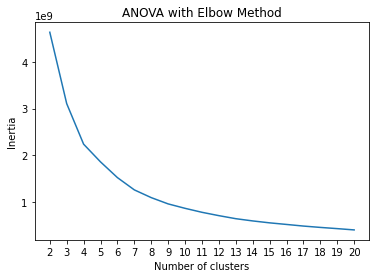

20

In [39]:
from olist_commons import select_k_with_anova
select_k_with_anova(crfm)

### Davis-Bouldin

Une approche couramment utilisée consiste à utiliser l'indice de Davies-Bouldin (DB) pour mesurer la qualité des clusters. L'indice de Davies-Bouldin mesure la distance moyenne entre les points d'un cluster et le centroïde du cluster, normalisée par la distance entre les centroïdes de deux clusters différents. Plus l'indice de Davies-Bouldin est faible, meilleure est la qualité des clusters.

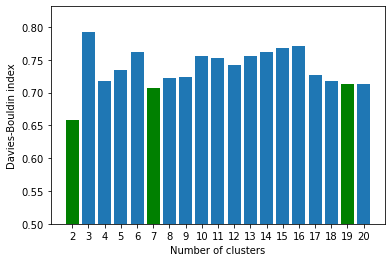

In [43]:
from olist_commons import select_k_with_davies_bouldin
select_k_with_davies_bouldin(crfm)